# 1 - Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Hillidatul Ilmi

Batch : FTDS-012

Dataset : Kartu Kredit

Objective : Model clustering untuk melakukan Customer Segmentation dari data kartu kredit. Berdasarkan hal ini, maka saya akan menanalisis clustering yaitu K-Means.

Dataset dapat diperoleh melalui bigquery, mengambil data Project ID : ftds-hacktiv8-project, Dataset Name : phase1_assignments, Table Name : credit-card-information. Menggunakan beberapa fitur yang di query, berikut salin query yang telah dibuat di Google Cloud Platform :



```
SELECT * FROM `ftds-hacktiv8-project.phase1_assignments.credit-card-information`
WHERE mod(CUST_ID,2) = 0;
``` # Menampilkan beberapa yang fitur yang akan dianalisis untuk clustering customer segmentation dengan kolom Cust_id bernilai genap karena FTDS 12

# 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

Import libraries digunakan untuk mengimpor isi modul dan digunakan untuk mendukung beberapa perintah sintaks yang akan di jalankan. Pada proses machine learning Graded Challenge 4 akan menggunakan library sebagai berikut :

In [ ]:
!pip install feature-engine
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score,silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


library yang akan saya gunakan untuk mengerjakan graded challenge 4 ini dari library numpy, pandas, matplotlib dan beberapa modul sklearn yang bervariasi untuk penggunaan dalam mendukung jalannya suatu model.

# 3 - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

Menampilkan atau memproses dataset berupa CSV dari drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Menampilkan data yang akan digunakan dalam analisis atau memuat dari kumpulan data 
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/h8dsft_P1G4_Hillidatul_ilmi.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000,8
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,2322,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000,8
3,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


In [ ]:
# Duplicate Data
data_copy = data.copy()

Mengandakan(duplicate) dataset nya, jika ada perubahan kolom atau atribut tetap bisa dibandingkan dengan dataset asli. Fungsi dari pengandaan agar data asli masih bisa digunakan jika ada beberapa perubahan isi dari dataset.

In [ ]:
# Mengecek ukuran dataset yang akan digunakan
print(data.shape)

(4475, 18)


Berdasarkan perintah .shape bahwa ukuran dataset riwayat seorang pasien terdiri dari 4475 baris dan 18 kolom

In [ ]:
# Melihat Nama-Nama kolom dari tabel dataset
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

data.columns melihatkan nama-nama fitur-fitur dari informasi 18 kolom sebelumnya 

In [ ]:
# Mengecek informasi dataset dari tabel dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Berdasarkan perintah data.info() bahwa tabel Kartu Kredit memiliki sekitar 18 kolom, dimana semua kolom teridentifikasi sebagai type integer dan float sebagai kolom numerik.

# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Informasi mengenai Customer Segmentation dari data kartu kredit terdiri dai 18 fitur, dimana setiap fitur memiliki karakteristik data yang berbeda antar fitur lainnya. Maka akan ditampilkan visualisasi distribusi pada masing-masing fitur yang mendukung kartu kredit.  Sumber Pengecekan distrubisi data : [link](https://www.kaggle.com/code/twaritshah/credit-card-customer-segmentation-pca-kmeans)

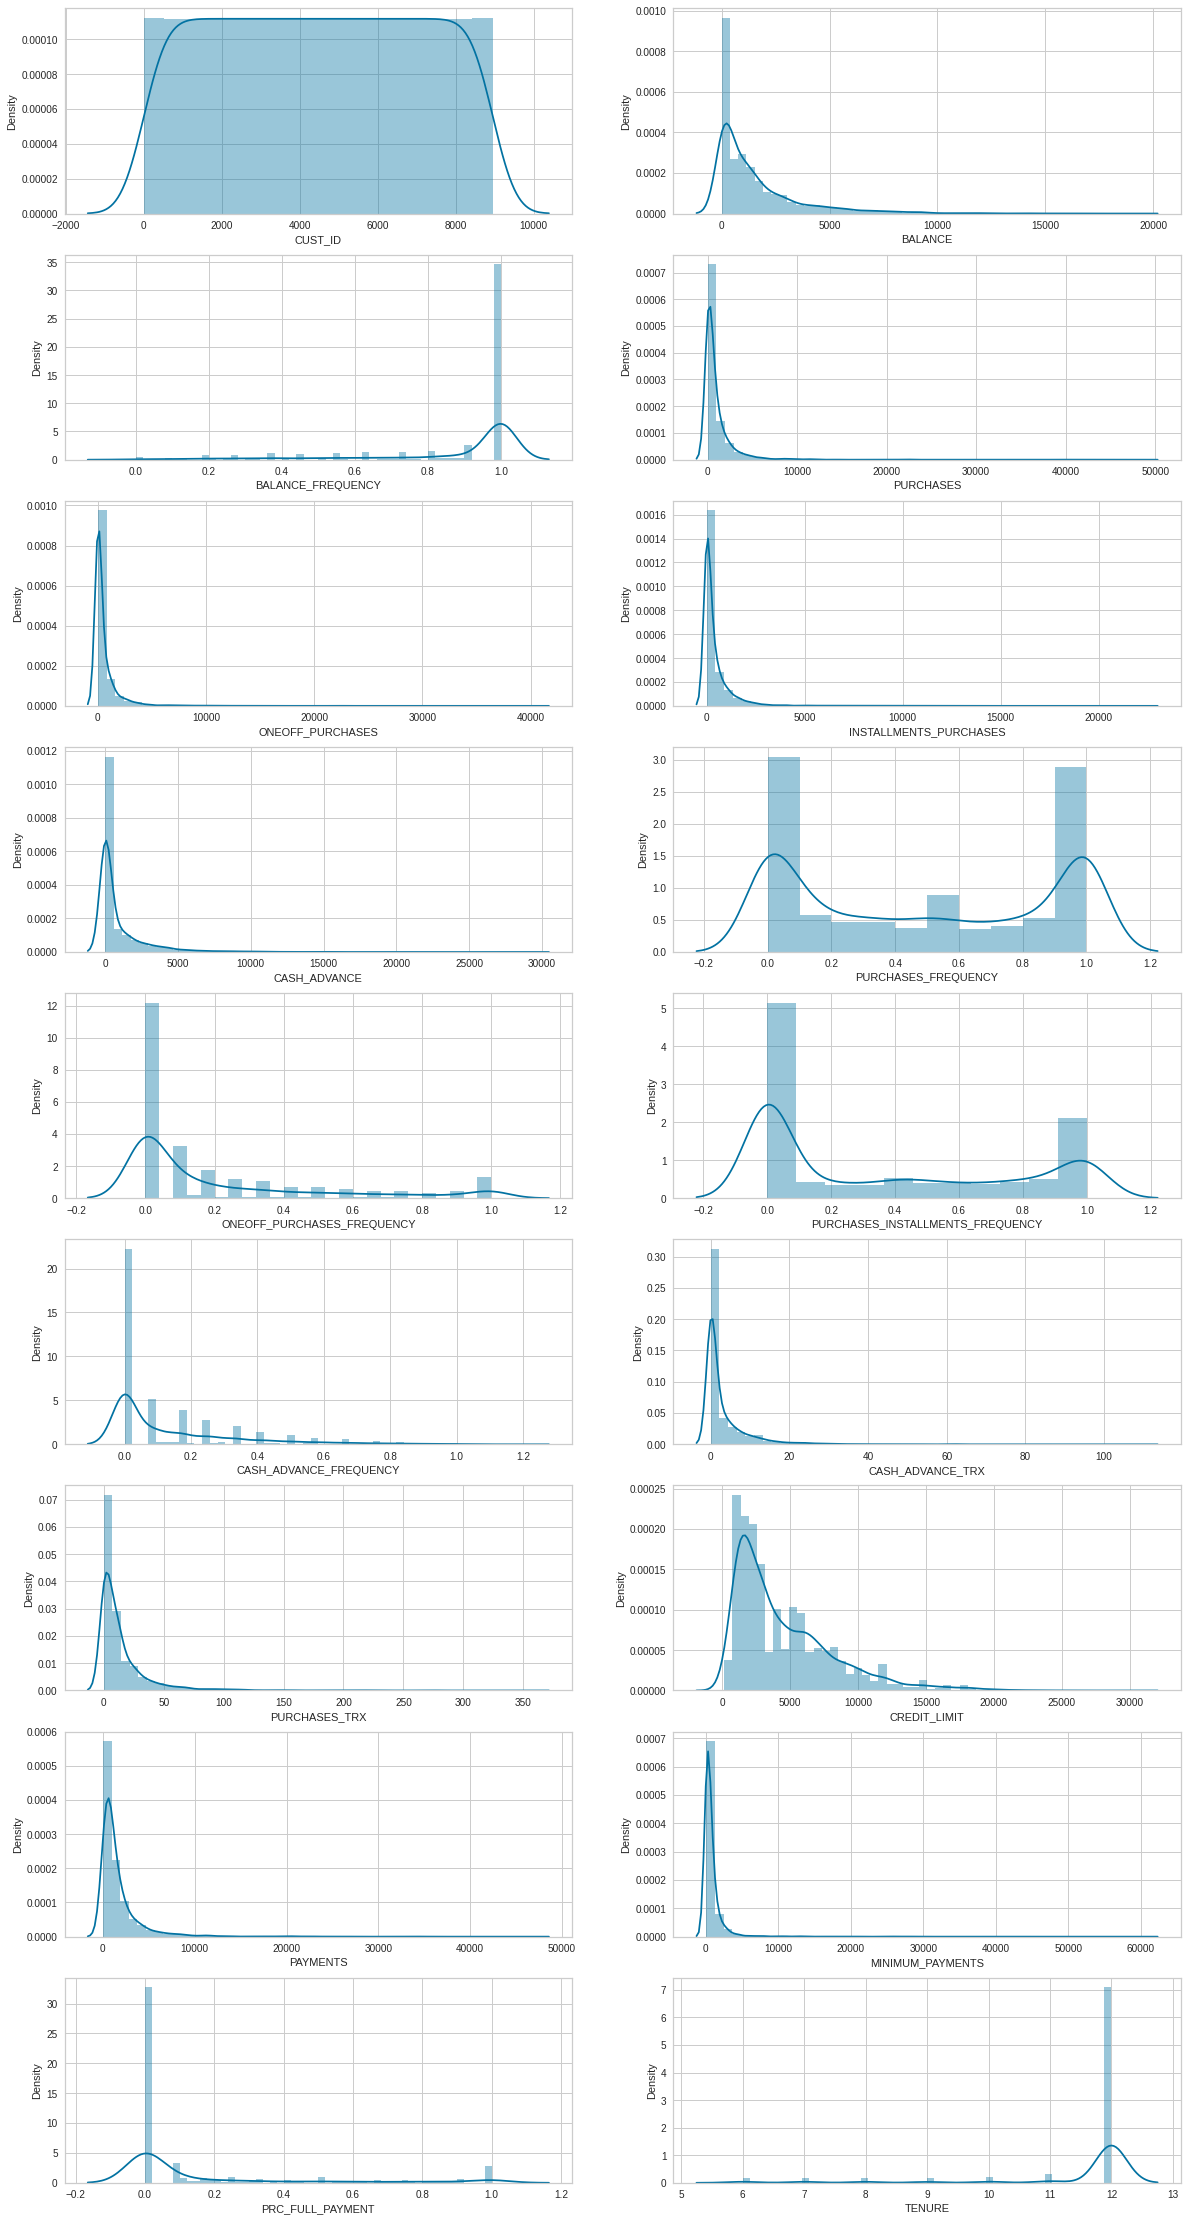

In [ ]:
# Melihat Sebaran distribusi fitur-fitur dari data Kartu Kredit
i=1
plt.figure(figsize= (20,40))
for col in data.columns:
    plt.subplot(9,2,i)
        
    sns.distplot(data[col])
    
    i=i+1
plt.show()

Berdasarkan hasil visualisasi data 18 fitur data kartu kredit, terdapat beberapa fitur yang mempunyai sebaran data berbentuk lonceng distribusi seperti, CUST_ID, PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY yang artinya bahwa sebaran data berkumpul di bagian tengah mean distribusi. Terdapat juga beberapa fitur membentuk lonceng kiri distribusi seperti BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, ONEOFF_PURCHASES_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS dan PRC_FULL_PAYMENT yang artinya seberan data berkumpul di sisi ekor kiri dengan nilai yang tidak sesui standar rasio skewness, biasanya ditandai dengan nilai skewness positif yang tinggi. Terdapat juga fitur membentuk lonceng kanan distribusi seperti BALANCE_FREQUENCY dan TENURE yang artinya seberan data berkumpul di sisi ekor kanan dengan nilai yang tidak sesui standar rasio skewness, biasanya ditandai dengan nilai skewness negatif yang rendah.


# 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-set dan inference-set, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## 5a - Data Inference

Dikutip dari aws.amazon.com, Inferensi adalah proses membuat prediksi menggunakan model terlatih. Model inference adalah data yang tidak tersedia di dalam dataset, jika dicari datanya tidak ada, maka di masukkan data baru. Jadi model inference itu data baru yang tidak ada di data set. Data inference menggunakan dataset yang ada.

In [ ]:
# Dapatkan Data untuk Inferensi Model
datainfernce = data.sample(10, random_state=10) 
datainfernce

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
867,5326,1995.089853,1.000000,8335.69,7400.85,934.84,0.000000,1.000000,0.818182,0.272727,0.000000,0,69,7000.0,3348.095046,1298.363292,0.000000,11
2566,7670,5825.287700,1.000000,230.00,230.00,0.00,1909.594385,0.083333,0.083333,0.000000,0.250000,3,1,7000.0,1537.817125,1442.075559,0.000000,12
814,4678,123.632161,1.000000,506.00,146.00,360.00,0.000000,1.000000,0.166667,1.000000,0.000000,0,14,6000.0,662.272892,184.935623,0.083333,12
2431,5972,463.071288,1.000000,0.00,0.00,0.00,1381.989484,0.000000,0.000000,0.000000,0.250000,7,0,1000.0,5445.356870,4496.934117,0.400000,12
1497,4784,24.176932,1.000000,189.85,189.85,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,4,3000.0,184.604550,100.687061,0.000000,12
4184,1980,2820.576665,0.818182,0.00,0.00,0.00,10717.891950,0.000000,0.000000,0.000000,0.583333,11,0,7000.0,9602.278174,937.556314,0.142857,12
3321,1358,2764.810135,1.000000,390.52,369.80,20.72,75.749860,0.333333,0.250000,0.083333,0.083333,2,6,3000.0,743.242536,1093.199562,0.000000,12
707,3424,126.945696,1.000000,1086.26,0.00,1086.26,0.000000,1.000000,0.000000,1.000000,0.000000,0,34,4500.0,981.005079,162.218628,0.916667,12
606,2284,0.000000,0.000000,152.28,0.00,152.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,0.000000,NaN,0.000000,12
2691,288,3558.685862,1.000000,1036.19,1036.19,0.00,3270.549354,0.250000,0.250000,0.000000,0.500000,11,6,7300.0,1616.614478,1100.977131,0.000000,12


Dari sekumpulan informasi dataset kartu kredit default, terdapat 10 data yang diduga tidak masuk dalam kumpulan dataset atau tetapi terdapat di bagian data inference.

In [ ]:
# Hapus Kumpulan Inferensi dari Kumpulan Data kartu kredit
data_test = data.drop(datainfernce.index)
data_test

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000,8
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,2322,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000,8
3,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


In [ ]:
data.shape

(4475, 18)

Ketika belum memisahkan data inference dari dataset bahwa, jumlah dataset awal riwayat kartu kredit memiliki 4475 baris kemudian menghilangkan/memisahkan data inference dari dataset kartu kredit default berubah menjadi 4465 baris.

In [ ]:
# Reset Index
# Agar tidak terjadi yang tidak diinginkan, data di reset index nya untuk keterurutan

data_test.reset_index(drop=True, inplace=True)
datainfernce.reset_index(drop=True, inplace=True)
datainfernce

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5326,1995.089853,1.000000,8335.69,7400.85,934.84,0.000000,1.000000,0.818182,0.272727,0.000000,0,69,7000.0,3348.095046,1298.363292,0.000000,11
1,7670,5825.287700,1.000000,230.00,230.00,0.00,1909.594385,0.083333,0.083333,0.000000,0.250000,3,1,7000.0,1537.817125,1442.075559,0.000000,12
2,4678,123.632161,1.000000,506.00,146.00,360.00,0.000000,1.000000,0.166667,1.000000,0.000000,0,14,6000.0,662.272892,184.935623,0.083333,12
3,5972,463.071288,1.000000,0.00,0.00,0.00,1381.989484,0.000000,0.000000,0.000000,0.250000,7,0,1000.0,5445.356870,4496.934117,0.400000,12
4,4784,24.176932,1.000000,189.85,189.85,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,4,3000.0,184.604550,100.687061,0.000000,12
5,1980,2820.576665,0.818182,0.00,0.00,0.00,10717.891950,0.000000,0.000000,0.000000,0.583333,11,0,7000.0,9602.278174,937.556314,0.142857,12
6,1358,2764.810135,1.000000,390.52,369.80,20.72,75.749860,0.333333,0.250000,0.083333,0.083333,2,6,3000.0,743.242536,1093.199562,0.000000,12
7,3424,126.945696,1.000000,1086.26,0.00,1086.26,0.000000,1.000000,0.000000,1.000000,0.000000,0,34,4500.0,981.005079,162.218628,0.916667,12
8,2284,0.000000,0.000000,152.28,0.00,152.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,0.000000,NaN,0.000000,12
9,288,3558.685862,1.000000,1036.19,1036.19,0.00,3270.549354,0.250000,0.250000,0.000000,0.500000,11,6,7300.0,1616.614478,1100.977131,0.000000,12


Dibagian data inference indexnya tidak terurut karena menyesuaikan letak baris dari data yang tidak termasuk dataset kartu kredit, tetapi setelah di reset index jadi tersusun index nomornya. Dilakukan restart index, agar ketika dijalankan sampai bawah atau proses selesai jika ada keselahan hasil, sudah dipastikan bukan karena index nya berantakan atau tidak beraturan.

## 5b - Handling Missing Value

Dikutip dari file.upi.edu.com, Missing value adalah informasi yang tidak tersedia untuk sebuah objek (kasus). Missing value terjadi karena informasi untuk sesuatu tentang objek tidak diberikan, sulit dicari, atau memang informasi tersebut tidak ada. Pada proses ini akan dilakukan pengecekan data missing value dengan .info() terlebih dahulu :

In [ ]:
# Mengecek Missing Values fitur-fitur data kartu kredit
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Berdasarkann hasil pengecekan missing value dengan data.isnull().sum() di ketahui fitur CREDIT_LIMIT memiliki nilai Nan sebanyak 1 baris dan fitur MINIMUM_PAYMENTS memiliki nilai Nan sebanyak 158 baris. Untuk memperbaiki data, maka baris yang tidak ada informasi akan dilakukan imputasi dengan mengiris baris kolom kosong mengunakan data median dari kolom yang terdapat data Nan. 

In [ ]:
# Memberi data baru pada baris kosong dengan nilai median
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)

In [ ]:
# Mengecek kembali missing value pada masing-masing fitur
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Setelah di lakukan pengisian informasi baru pada baris data kosong, maka maising-maising fitur sudah tidak terdapat Missing Value.

## 5c - Handling Outlier

Dikutik dari statistika.com, Data Outlier disebut juga dengan data pencilan nilai ekstrim. Yang dimaksud dengan nilai-nilai ekstrim dalam observasi adalah nilai yang jauh atau beda sama sekali dengan sebagian besar nilai lain dalam kelompoknya.

Untuk mengatasi nilai outlier, saya memilih metode Censoring. Censoring atau capping, berfungsi untuk membatasi distribusi maksimum atau minimum pada nilai yang berubah-ubah. Pengubahan skala agar masuk ke dalam boxplot. Saya tidak memilih metode Trimming atau penghapusan, agar dimensi ukuran metriks nya tetap sama dan jumlah data masih terjaga.

In [ ]:
# Berfungsi untuk membuat histogram dan boxplot.
# Fungsi ini menggunakan kerangka data census_adult_income dan variabel yang diinginkan sebagai argumen.

def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

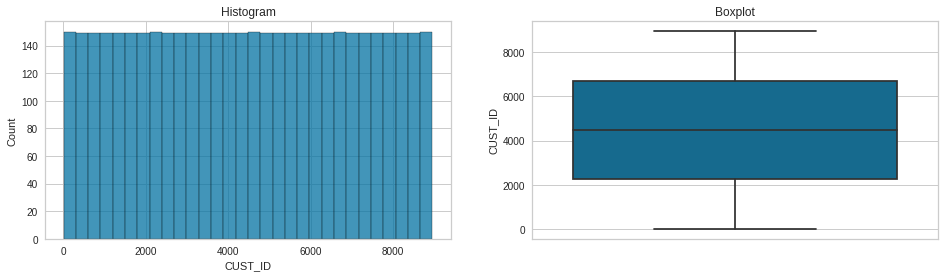


Skewness Value CUST_ID :  0.0


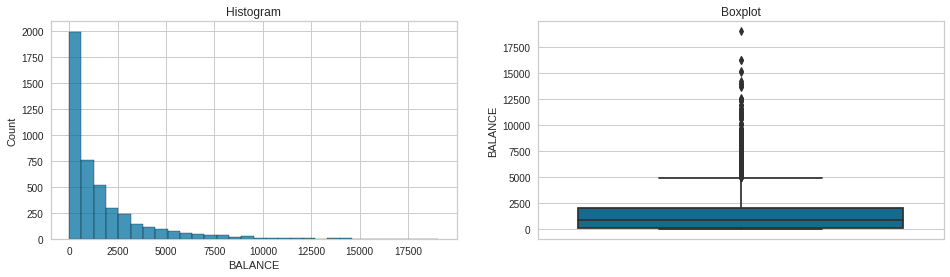


Skewness Value BALANCE :  2.456620962191608


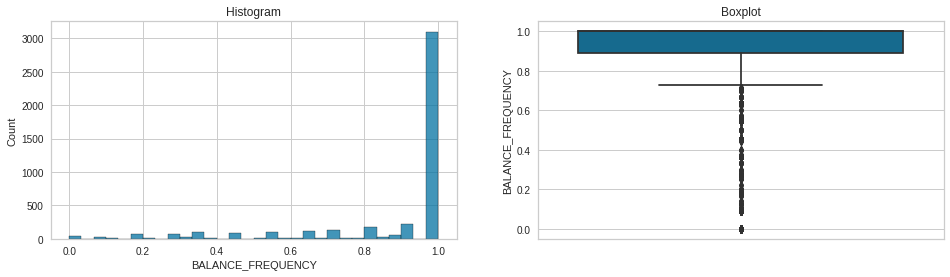


Skewness Value BALANCE_FREQUENCY :  -2.020309250153954


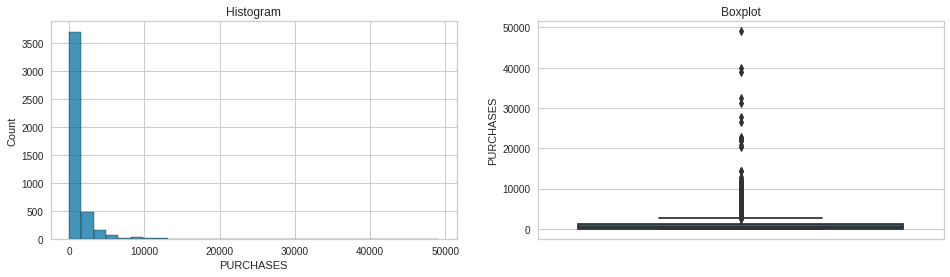


Skewness Value PURCHASES :  8.987051591977552


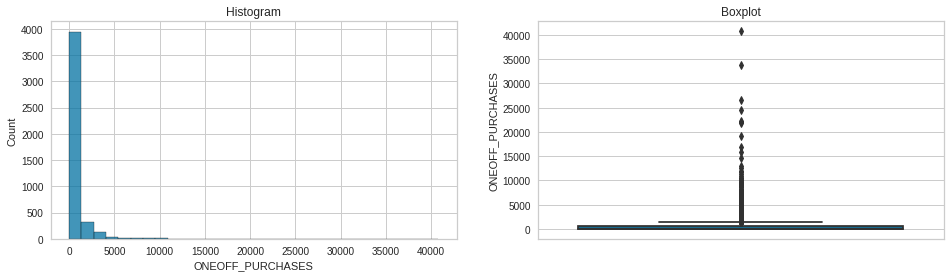


Skewness Value ONEOFF_PURCHASES :  10.140058770209015


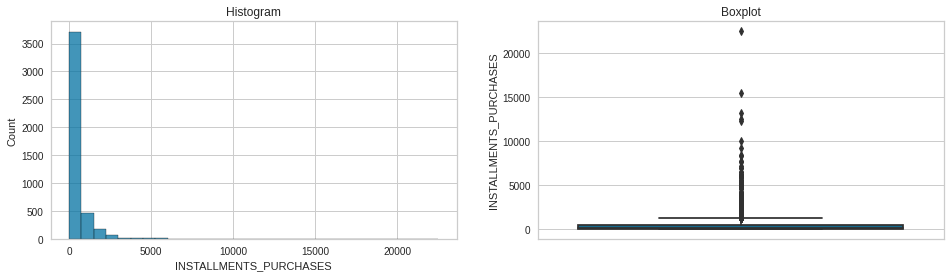


Skewness Value INSTALLMENTS_PURCHASES :  8.116887369354234


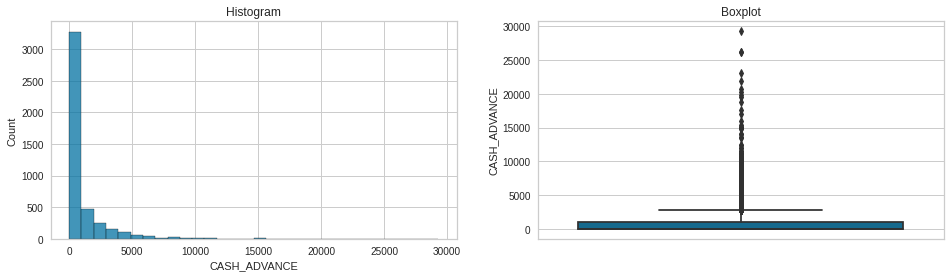


Skewness Value CASH_ADVANCE :  4.739677538274201


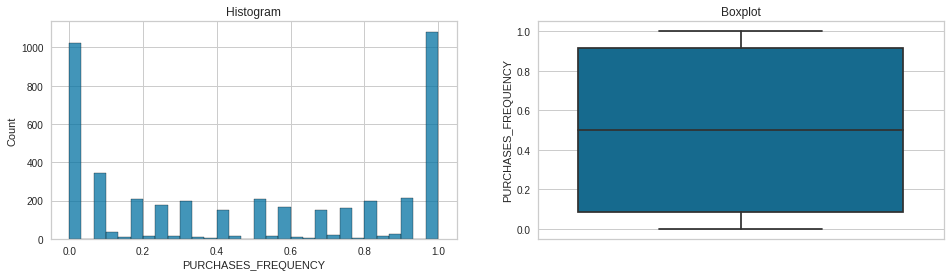


Skewness Value PURCHASES_FREQUENCY :  0.06159754482450298


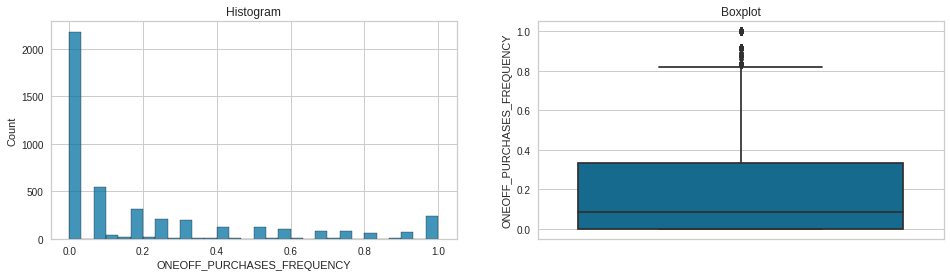


Skewness Value ONEOFF_PURCHASES_FREQUENCY  :  1.5234554787719887


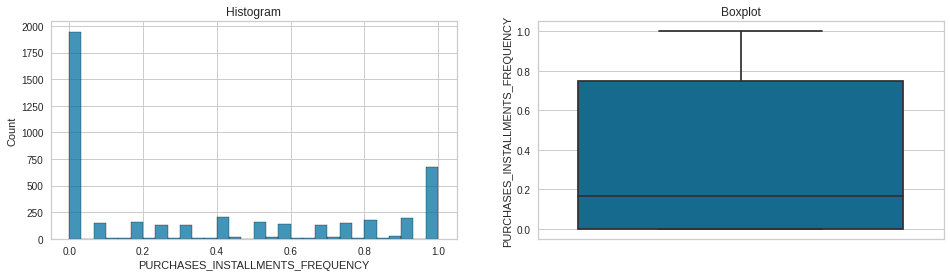


Skewness Value PURCHASES_INSTALLMENTS_FREQUENCY :  0.5102876658863782


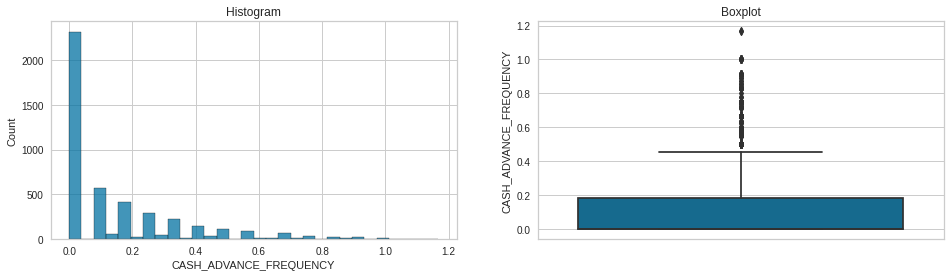


Skewness Value CASH_ADVANCE_FREQUENCY :  1.8233800138256115


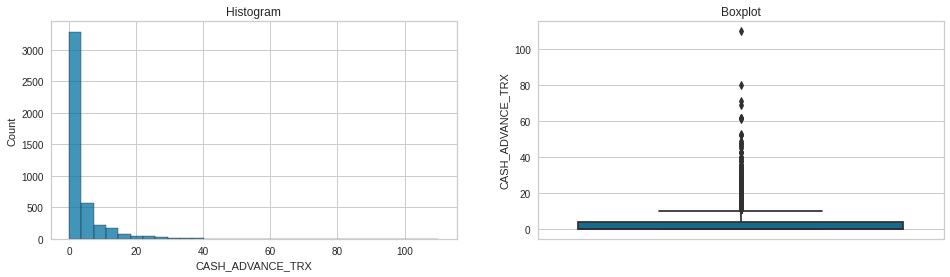


Skewness Value CASH_ADVANCE_TRX :  4.75278000331602


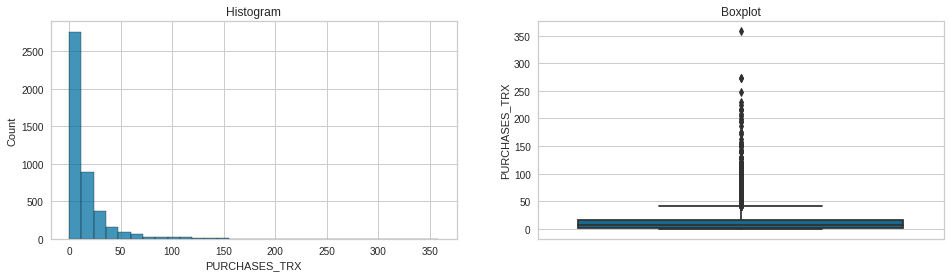


Skewness Value PURCHASES_TRX :  4.480452469147952


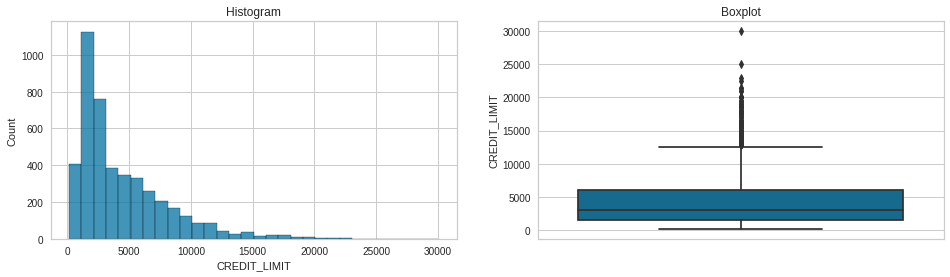


Skewness Value CREDIT_LIMIT :  1.545422651648898


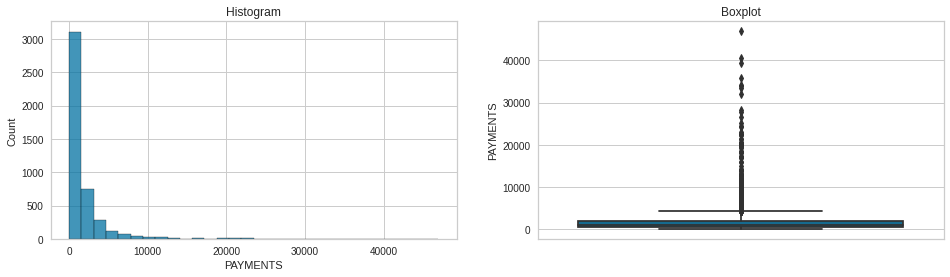


Skewness Value PAYMENTS  :  6.040773400922328


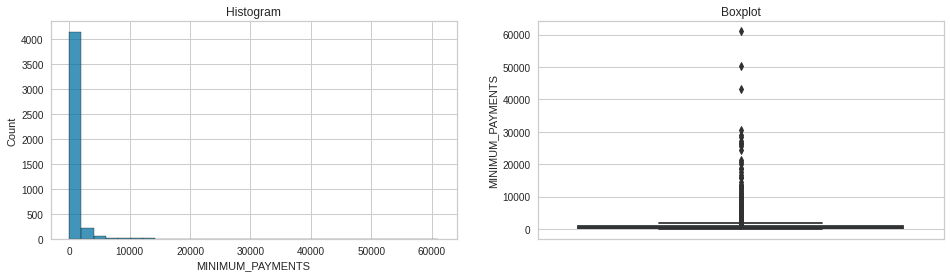


Skewness Value MINIMUM_PAYMENTS :  12.56971436375272


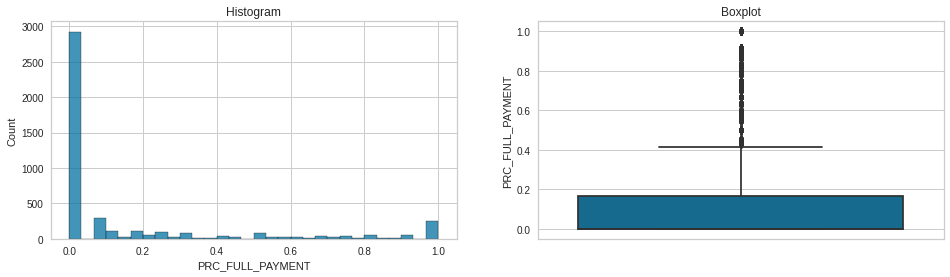


Skewness Value PRC_FULL_PAYMENT :  1.9116495684046537


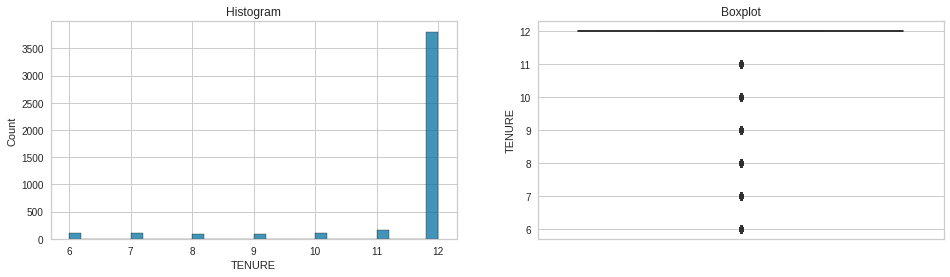


Skewness Value TENURE :  -2.9328221430257617


In [ ]:
# Mengecek Distribusi fitur dan outlier menggunakan Boxplot

diagnostic_plots(data, 'CUST_ID')
print('\nSkewness Value CUST_ID : ', data['CUST_ID'].skew())

diagnostic_plots(data, 'BALANCE')
print('\nSkewness Value BALANCE : ', data['BALANCE'].skew())

diagnostic_plots(data, 'BALANCE_FREQUENCY')
print('\nSkewness Value BALANCE_FREQUENCY : ', data['BALANCE_FREQUENCY'].skew())

diagnostic_plots(data, 'PURCHASES')
print('\nSkewness Value PURCHASES : ', data['PURCHASES'].skew())

diagnostic_plots(data, 'ONEOFF_PURCHASES')
print('\nSkewness Value ONEOFF_PURCHASES : ', data['ONEOFF_PURCHASES'].skew())

diagnostic_plots(data, 'INSTALLMENTS_PURCHASES')
print('\nSkewness Value INSTALLMENTS_PURCHASES : ', data['INSTALLMENTS_PURCHASES'].skew())

diagnostic_plots(data, 'CASH_ADVANCE')
print('\nSkewness Value CASH_ADVANCE : ', data['CASH_ADVANCE'].skew())

diagnostic_plots(data, 'PURCHASES_FREQUENCY')
print('\nSkewness Value PURCHASES_FREQUENCY : ', data['PURCHASES_FREQUENCY'].skew())

diagnostic_plots(data, 'ONEOFF_PURCHASES_FREQUENCY')
print('\nSkewness Value ONEOFF_PURCHASES_FREQUENCY  : ', data['ONEOFF_PURCHASES_FREQUENCY'].skew())

diagnostic_plots(data, 'PURCHASES_INSTALLMENTS_FREQUENCY')
print('\nSkewness Value PURCHASES_INSTALLMENTS_FREQUENCY : ', data['PURCHASES_INSTALLMENTS_FREQUENCY'].skew())

diagnostic_plots(data, 'CASH_ADVANCE_FREQUENCY')
print('\nSkewness Value CASH_ADVANCE_FREQUENCY : ', data['CASH_ADVANCE_FREQUENCY'].skew())

diagnostic_plots(data, 'CASH_ADVANCE_TRX')
print('\nSkewness Value CASH_ADVANCE_TRX : ', data['CASH_ADVANCE_TRX'].skew())

diagnostic_plots(data, 'PURCHASES_TRX')
print('\nSkewness Value PURCHASES_TRX : ', data['PURCHASES_TRX'].skew())

diagnostic_plots(data, 'CREDIT_LIMIT')
print('\nSkewness Value CREDIT_LIMIT : ', data['CREDIT_LIMIT'].skew())

diagnostic_plots(data, 'PAYMENTS')
print('\nSkewness Value PAYMENTS  : ', data['PAYMENTS'].skew())

diagnostic_plots(data, 'MINIMUM_PAYMENTS')
print('\nSkewness Value MINIMUM_PAYMENTS : ', data['MINIMUM_PAYMENTS'].skew())

diagnostic_plots(data, 'PRC_FULL_PAYMENT')
print('\nSkewness Value PRC_FULL_PAYMENT : ', data['PRC_FULL_PAYMENT'].skew())

diagnostic_plots(data, 'TENURE')
print('\nSkewness Value TENURE : ', data['TENURE'].skew())

Dikatakan berdistribusi normal ketika nilai rasio skewness berada pada rentang nilai -2 sampai 2. Delapan Fitur berupa Batas CUST_ID, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CREDIT_LIMIT, PAYMENTS dan PRC_FULL_PAYMENT, semua datanya berdistribusi normal karena memiliki nilai skewness yang sesuai standarnya. Sedangkan sepuluh fitur BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, CASH_ADVANCE_TRX, PURCHASES_TRX, MINIMUM_PAYMENTS dan TENURE, memiliki data tidak berdistribusi normal karena memiliki nilai skewness yang tidak sesuai standarnya. Visualisasi boxplot 10 fitur terdapat outlier di bagian upper boxplot/bagian atas boxplot dan lower boxplot/bagian bawah boxplot. Oleh karena itu akan di cari terlebih dahulu nilai IQR untuk menyamakan range nilainya agar masuk ke dalam boxplot. Serta membuat data menjadi berdistribusi normal.

In [ ]:
# Menghitung/menentukan nilai IQR untuk data yang terdapat outlier
X = Winsorizer(capping_method='iqr', # pilih iqr untuk batas aturan IQR atau gaussian untuk mean dan std
                          tail='both',
                          fold=1.5,
                          variables=['CUST_ID','BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES',
                                     'CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY',
                                     'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS',
                                     'PRC_FULL_PAYMENT','TENURE'])
X.fit(data)
data_clean = X.transform(data) 

Setelah kita mengetahui fitur yang terdapat outlier, selanjutnya akan diatasi outlier tersebut dengan menggunakan metode interquartile range (IQR). IQR akan mentolerir nilai minimum yang jauh dari data dan nilai maksimum yang menjauhi himpunan kelompok data, dengan mengubah range minimum dan maksimum ke dalam kelompok himpunan data yang seharusnya. IQR yang didapat akan dikalikan dengan 1.5 untuk sisi kanan dan sisi kiri. Karena seluruh fitur memiliki bentuk distribusi tidak sesuai dengan beberapa nilai outlier, maka akan dilakukan range outlier.


CUST_ID - Setelah Handling Outlier Capping


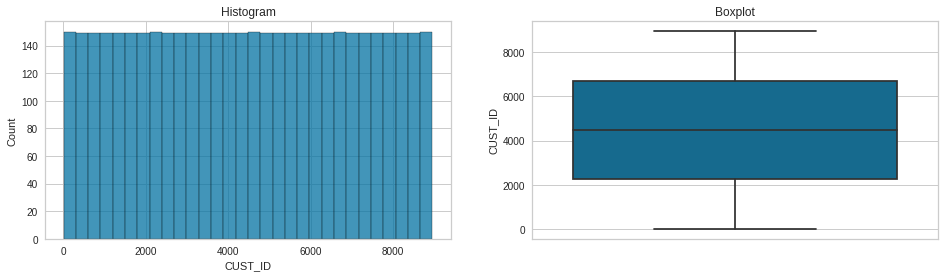


Skewness Value CUST_ID :  0.0

BALANCE - Setelah Handling Outlier Capping


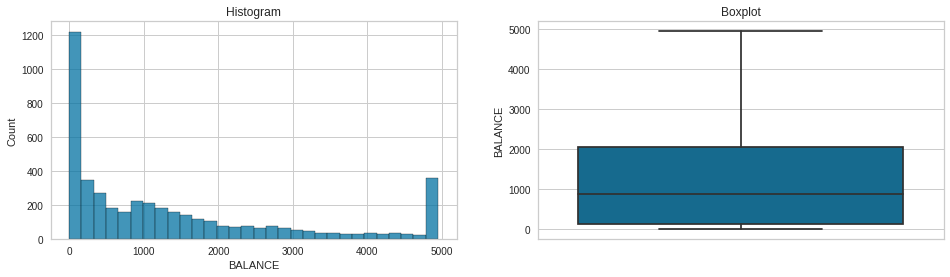


Skewness Value BALANCE :  1.1657259121091936

BALANCE_FREQUENCY - Setelah Handling Outlier Capping


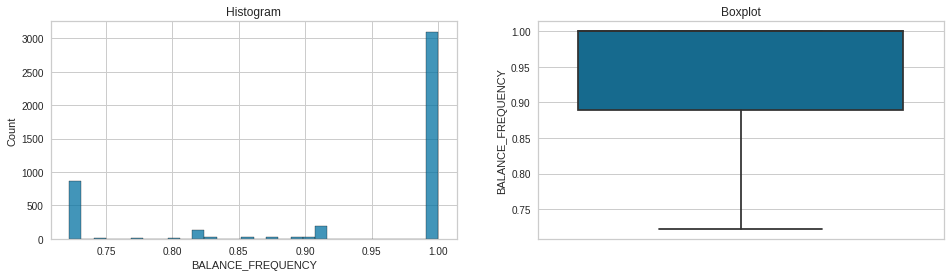


Skewness Value BALANCE_FREQUENCY :  -1.1674538343455074

PURCHASES - Setelah Handling Outlier Capping


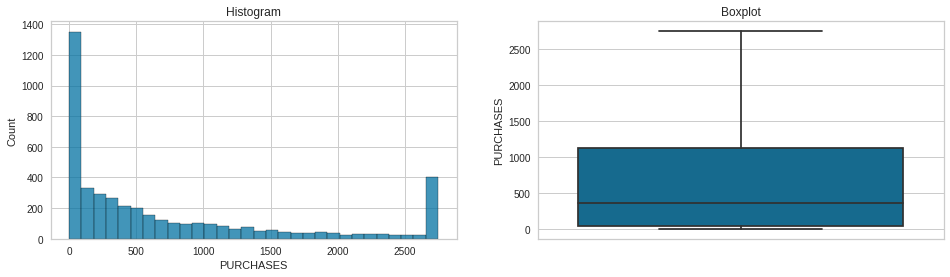


Skewness Value PURCHASES :  1.2075019477372246

ONEOFF_PURCHASES - Setelah Handling Outlier Capping


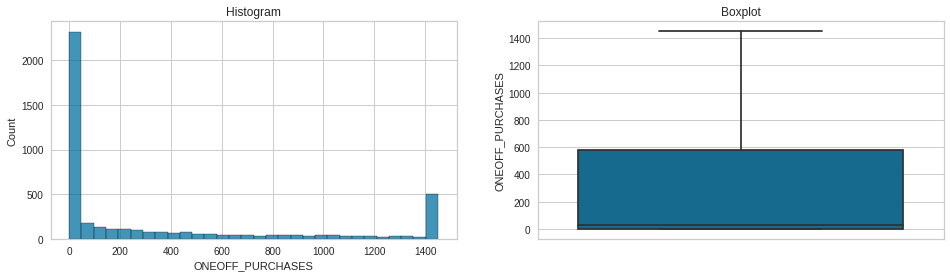


Skewness Value ONEOFF_PURCHASES :  1.2283840370656014

INSTALLMENTS_PURCHASES - Setelah Handling Outlier Capping


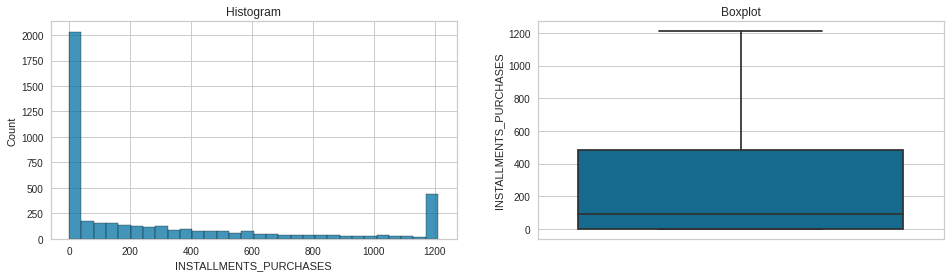


Skewness Value INSTALLMENTS_PURCHASES :  1.2283331745312547

CASH_ADVANCE - Setelah Handling Outlier Capping


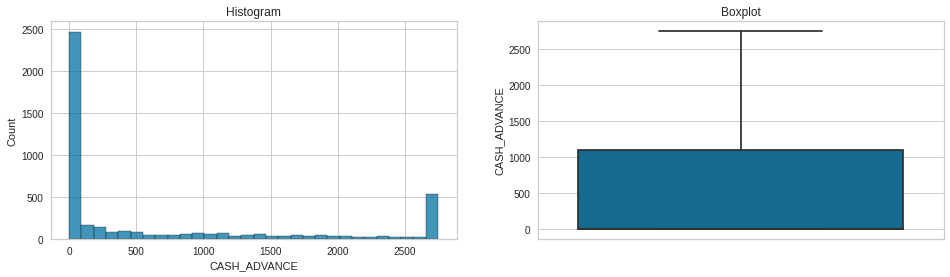


Skewness Value CASH_ADVANCE :  1.264300755225504

PURCHASES_FREQUENCY - Setelah Handling Outlier Capping


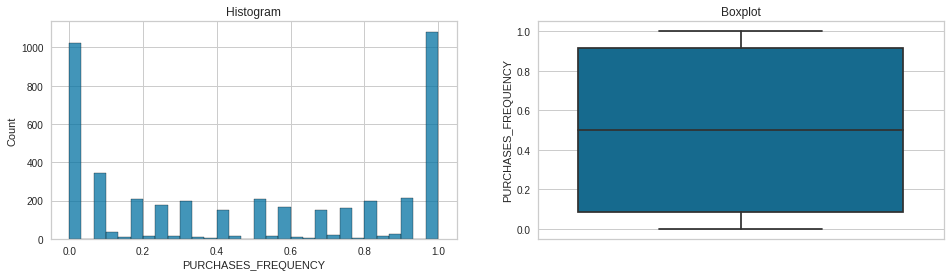


Skewness Value PURCHASES_FREQUENCY :  0.06159754482450298

ONEOFF_PURCHASES_FREQUENCY - Setelah Handling Outlier Capping


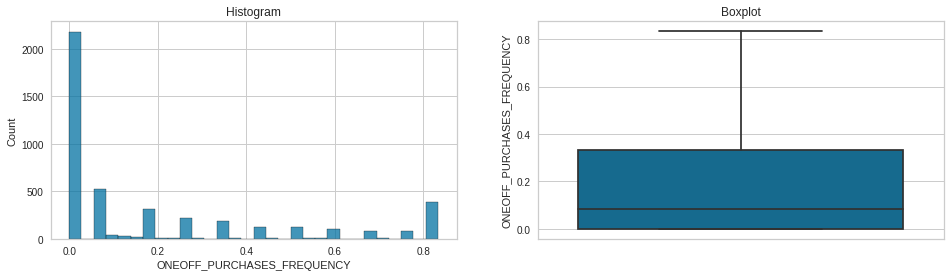


Skewness Value ONEOFF_PURCHASES_FREQUENCY  :  1.3412151499200158

PURCHASES_INSTALLMENTS_FREQUENCY - Setelah Handling Outlier Capping


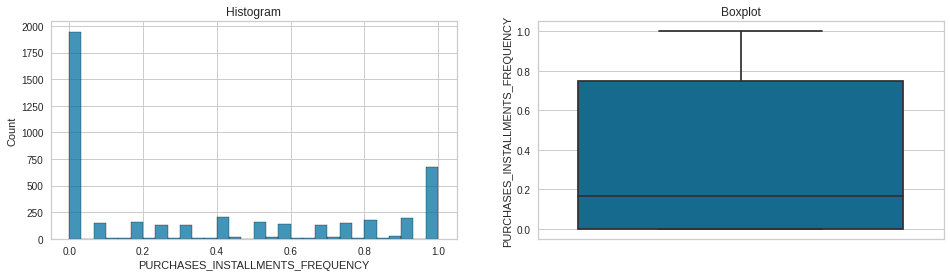


Skewness Value PURCHASES_INSTALLMENTS_FREQUENCY :  0.5102876658863782

CASH_ADVANCE_FREQUENCY - Setelah Handling Outlier Capping


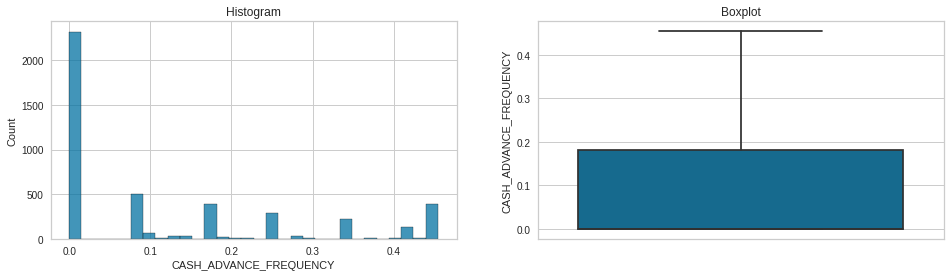


Skewness Value CASH_ADVANCE_FREQUENCY :  1.077506221596407

CASH_ADVANCE_TRX - Setelah Handling Outlier Capping


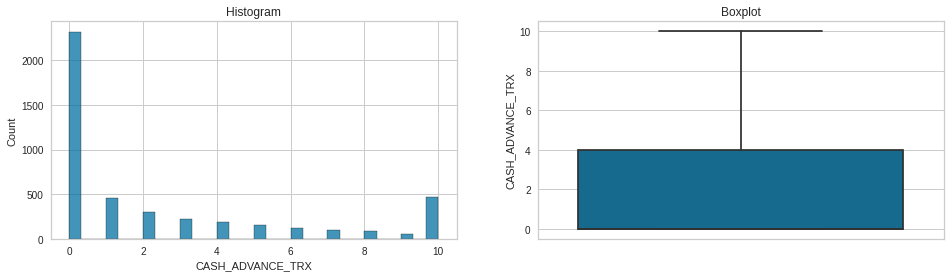


Skewness Value CASH_ADVANCE_TRX :  1.2872746005964386

PURCHASES_TRX - Setelah Handling Outlier Capping


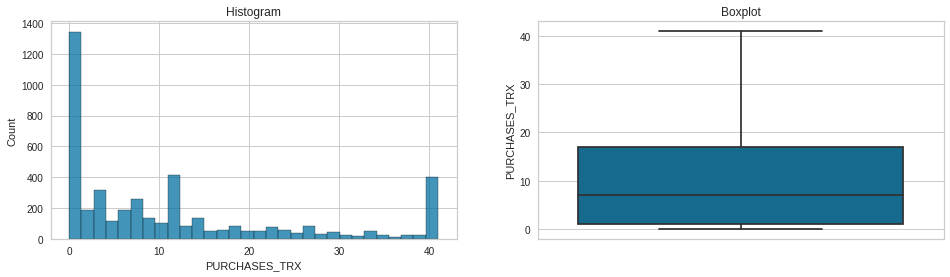


Skewness Value PURCHASES_TRX :  1.1456681579218924

CREDIT_LIMIT - Setelah Handling Outlier Capping


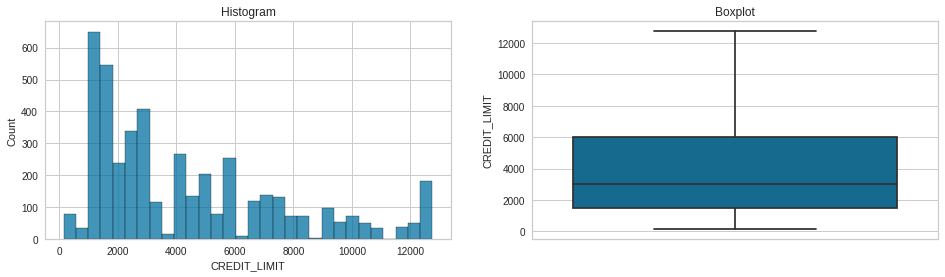


Skewness Value CREDIT_LIMIT :  1.0071527638070132

PAYMENTS - Setelah Handling Outlier Capping


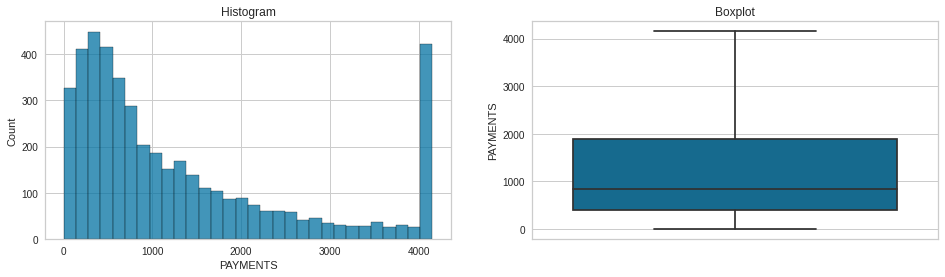


Skewness Value PAYMENTS  :  1.1418651301663274

MINIMUM_PAYMENTS - Setelah Handling Outlier Capping


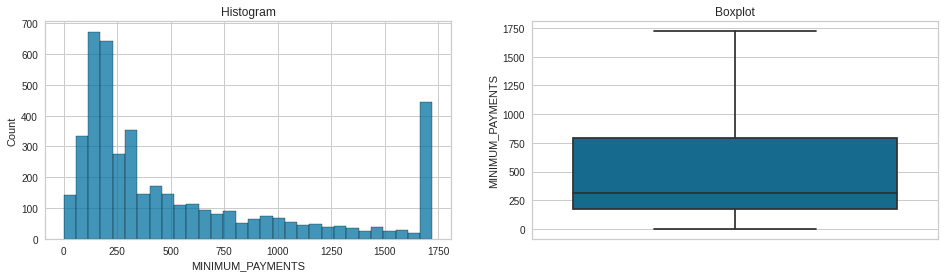


Skewness Value MINIMUM_PAYMENTS :  1.1810660472473107

PRC_FULL_PAYMENT - Setelah Handling Outlier Capping


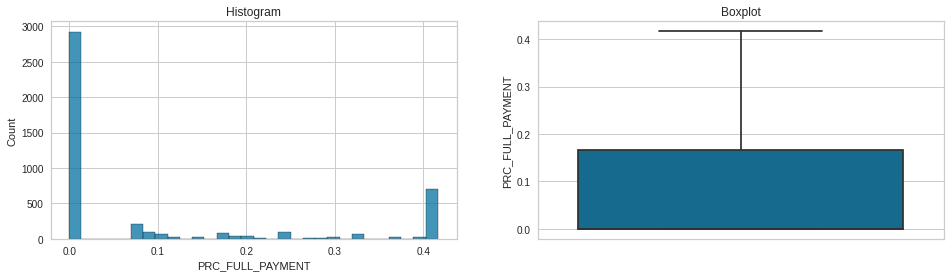


Skewness Value PRC_FULL_PAYMENT :  1.2721768710035686

TENURE - Setelah Handling Outlier Capping


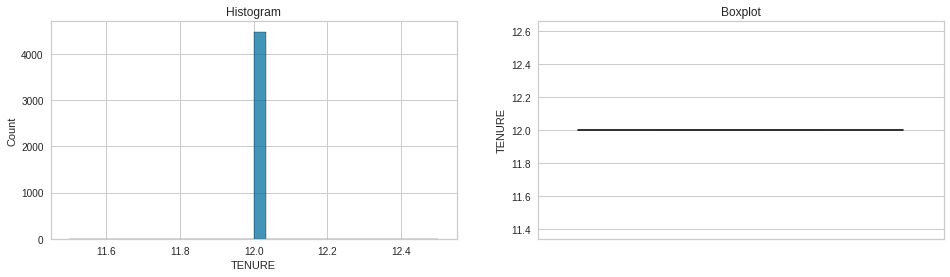


Skewness Value TENURE :  0


In [ ]:
# Visualisasi Setelah Handling Outlier
print('\nCUST_ID - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'CUST_ID')
print('\nSkewness Value CUST_ID : ', data_clean['CUST_ID'].skew())

print('\nBALANCE - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'BALANCE')
print('\nSkewness Value BALANCE : ', data_clean['BALANCE'].skew())

print('\nBALANCE_FREQUENCY - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'BALANCE_FREQUENCY')
print('\nSkewness Value BALANCE_FREQUENCY : ', data_clean['BALANCE_FREQUENCY'].skew())

print('\nPURCHASES - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'PURCHASES')
print('\nSkewness Value PURCHASES : ', data_clean['PURCHASES'].skew())

print('\nONEOFF_PURCHASES - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'ONEOFF_PURCHASES')
print('\nSkewness Value ONEOFF_PURCHASES : ', data_clean['ONEOFF_PURCHASES'].skew())

print('\nINSTALLMENTS_PURCHASES - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'INSTALLMENTS_PURCHASES')
print('\nSkewness Value INSTALLMENTS_PURCHASES : ', data_clean['INSTALLMENTS_PURCHASES'].skew())

print('\nCASH_ADVANCE - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'CASH_ADVANCE')
print('\nSkewness Value CASH_ADVANCE : ', data_clean['CASH_ADVANCE'].skew())

print('\nPURCHASES_FREQUENCY - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'PURCHASES_FREQUENCY')
print('\nSkewness Value PURCHASES_FREQUENCY : ', data_clean['PURCHASES_FREQUENCY'].skew())

print('\nONEOFF_PURCHASES_FREQUENCY - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'ONEOFF_PURCHASES_FREQUENCY')
print('\nSkewness Value ONEOFF_PURCHASES_FREQUENCY  : ', data_clean['ONEOFF_PURCHASES_FREQUENCY'].skew())

print('\nPURCHASES_INSTALLMENTS_FREQUENCY - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'PURCHASES_INSTALLMENTS_FREQUENCY')
print('\nSkewness Value PURCHASES_INSTALLMENTS_FREQUENCY : ', data_clean['PURCHASES_INSTALLMENTS_FREQUENCY'].skew())

print('\nCASH_ADVANCE_FREQUENCY - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'CASH_ADVANCE_FREQUENCY')
print('\nSkewness Value CASH_ADVANCE_FREQUENCY : ', data_clean['CASH_ADVANCE_FREQUENCY'].skew())

print('\nCASH_ADVANCE_TRX - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'CASH_ADVANCE_TRX')
print('\nSkewness Value CASH_ADVANCE_TRX : ', data_clean['CASH_ADVANCE_TRX'].skew())

print('\nPURCHASES_TRX - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'PURCHASES_TRX')
print('\nSkewness Value PURCHASES_TRX : ', data_clean['PURCHASES_TRX'].skew())

print('\nCREDIT_LIMIT - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'CREDIT_LIMIT')
print('\nSkewness Value CREDIT_LIMIT : ', data_clean['CREDIT_LIMIT'].skew())

print('\nPAYMENTS - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'PAYMENTS')
print('\nSkewness Value PAYMENTS  : ', data_clean['PAYMENTS'].skew())

print('\nMINIMUM_PAYMENTS - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'MINIMUM_PAYMENTS')
print('\nSkewness Value MINIMUM_PAYMENTS : ', data_clean['MINIMUM_PAYMENTS'].skew())

print('\nPRC_FULL_PAYMENT - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'PRC_FULL_PAYMENT')
print('\nSkewness Value PRC_FULL_PAYMENT : ', data_clean['PRC_FULL_PAYMENT'].skew())

print('\nTENURE - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'TENURE')
print('\nSkewness Value TENURE : ', data_clean['TENURE'].skew())

Visualisasi histogram untuk distribusi normal dan boxplot identifikasi data oulier, berdasarkan gambar di atas bahwa 18 sudah berdistribusi normal. Dikatakan berdistribusi normal ketika nilai rasio skewness berada pada rentang nilai -2 sampai 2, dimana kelima fitur tersebut memiliki nilai skewness sesuai standar penentuan. Untuk Data oulier sudah tidak ada lagi, karena semua data dari 18 fitur yang menjauh dari pusat rata-rata sampel telah di sensoring semuanya untuk mempunyai range yang sama dalam kempulan/himpunan data. Sehingga sudah tidak ada lagi data outlier.

In [ ]:
# Diperoleh data baru yang sudah dilakukan feature engineering 
# Variabel data_clean sudah bersih dari Missing Value dan Outlier
data_clean

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788.0,16.581535,0.722223,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0.0,2.0,1200.0,0.000000,309.854995,0.000000,12.0
1,1902.0,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0.0,1.0,1000.0,215.325023,410.484825,0.000000,12.0
2,2322.0,1.979916,0.722223,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0.0,1.0,1500.0,0.000000,309.854995,0.000000,12.0
3,3426.0,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0.0,1.0,1000.0,258.032630,151.696433,0.000000,12.0
4,3976.0,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0.0,1.0,1500.0,397.090516,227.143184,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630.0,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.454545,9.0,0.0,1200.0,1379.635287,271.364415,0.090909,12.0
4471,8614.0,809.582978,0.909091,0.00,0.00,0.00,2746.424905,0.000000,0.000000,0.000000,0.454545,7.0,0.0,4150.0,4154.587951,241.645387,0.090909,12.0
4472,4296.0,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.454545,9.0,20.0,10100.0,1039.000037,886.050237,0.000000,12.0
4473,4476.0,4840.545574,1.000000,1595.93,1450.80,0.00,2746.424905,0.454545,0.454545,0.000000,0.454545,10.0,25.0,6000.0,905.844846,1721.947132,0.090909,12.0


## 5d - Pemisahan Kolom Numerik dan Kategorik
Dikutip dari idikuu.com, Data numerik adalah data yang dapat diukur, kemudian data tersebut dapat kita olah sedemikian rupa seperti diurutkan, dicari rata-rata, paling banyak muncul dan lain sebagainya. Sedangkan Data kategorik adalah jenis data yang terdiri dari variabel atau data dari hasil pengelompokkan berdasarkan kategori yang telah ditentukan. Berdasarkan definisi kedua jenis data tersebut, bahwa terdapat perbedaan karakterstik data pada masing-masing fitur, oleh karena itu harus dilakukan pemisahan.

In [ ]:
# Memisahkan berkategori data Numerik dan data kategorik

numerik_col = data_clean._get_numeric_data().columns.tolist()
kategorik_col = data_clean.select_dtypes(include=['object']).columns.tolist()

print('Numeric Columns     : ', numerik_col)
print('Categorical Columns : ', kategorik_col)

Numeric Columns     :  ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
Categorical Columns :  []


Berdasarkan spliting data numerik dan kategorik, bahwa data kartu kredit seluruhny bernilia data numerik dan tidak terdapat data kategorik.

## 5e - Handling Imbalance dan Feature Scaling

Data imbalance merupakan sebuah permasalahan yang lazim pada dataset, dimana disribusi antara data mayoritas (Negative) dan minoritas (positive) tidak seimbang. Dikutip dari medium.com, Feature Scaling adalah suatu cara untuk membuat numerical data pada dataset memiliki rentang nilai (scale) yang sama. Tidak ada lagi satu variabel data yang mendominasi variabel data lainnya.

In [ ]:
# data imbalanced
# Membuat data menjadi setara antara cluster pengelompokan
imbalanced_num = data_clean[numerik_col].reset_index().drop(['index'], axis = 1)

In [ ]:
# Numeric Scaling
# Membuat antara fitur memiliki range ukuran yang sama
imbalanced_num_scaler = StandardScaler()
imbalanced_num_scaler = imbalanced_num_scaler.fit(imbalanced_num)
datagood = imbalanced_num_scaler.transform(imbalanced_num)
datagood

array([[-1.42744213, -0.89687192, -1.88255836, ..., -0.46348498,
        -0.62177848,  0.        ],
       [-0.99626791, -0.29121749, -0.50713459, ..., -0.27263083,
        -0.62177848,  0.        ],
       [-0.83370671, -0.90641184, -1.88255836, ..., -0.46348498,
        -0.62177848,  0.        ],
       ...,
       [-0.06966908,  1.30484869,  0.61821417, ...,  0.6293247 ,
        -0.62177848,  0.        ],
       [ 0.        ,  2.25485115,  0.61821417, ...,  2.21468353,
        -0.04733894,  0.        ],
       [-0.35299003,  0.38396649,  0.61821417, ...,  0.67608961,
        -0.04733894,  0.        ]])

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = imbalanced_num.columns

# Menghitung VIF untuk setiap fitur
vif_data["VIF"] = [variance_inflation_factor(imbalanced_num.values, i)
						for i in range(len(imbalanced_num.columns))]

print(vif_data)

                             feature        VIF
0                            CUST_ID   1.002690
1                            BALANCE   5.533314
2                  BALANCE_FREQUENCY   1.441665
3                          PURCHASES  16.072775
4                   ONEOFF_PURCHASES  10.624604
5             INSTALLMENTS_PURCHASES   7.392737
6                       CASH_ADVANCE   3.526288
7                PURCHASES_FREQUENCY  10.837342
8         ONEOFF_PURCHASES_FREQUENCY   6.679301
9   PURCHASES_INSTALLMENTS_FREQUENCY  12.157356
10            CASH_ADVANCE_FREQUENCY   7.946480
11                  CASH_ADVANCE_TRX   8.465566
12                     PURCHASES_TRX   6.283434
13                      CREDIT_LIMIT   1.843062
14                          PAYMENTS   2.034811
15                  MINIMUM_PAYMENTS   3.558536
16                  PRC_FULL_PAYMENT   1.564782
17                            TENURE  96.352804


VIF adalah suatu faktor yang mengukur seberapa besar kenaikan ragam dari koefisien penduga regresi dibandingkan terhadap variabel bebas yang orthogonal jika dihubungkan secara linear. Nilai VIF akan semakin besar jika terdapat korelasi yang semakin besar diantara variabel bebas.  Nilai VIF dikatakan baik jika < 5, ada 6 fitur yang memiliki niai VIF < 5, bearti akan direduksi menjadi 6 kelompok data yang bisa mengambil informasi secara keseluruhan.Sumber pengecekan nilai VIF [link](https://www.pengembangan-web-mp-pd.com/id/python/variance-inflation-factor-dalam-python/831428707/)





## 5f - Principal component analysis (PCA)

Dikutip dari algorit.ma.com, Principal component analysis (PCA) adalah suatu teknik analisis yang digunakan dalam bidang statistika dan juga data science. Dengan memanfaatkan teknik analisis ini, Anda dapat meringkas informasi yang tercantum dalam tabel data besar hingga menjadi beberapa kumpulan indeks ringkasan yang lebih kecil.

In [ ]:
# Melakukan kompres informasi data atau meringkas informasi data
pca = PCA()
pca.fit(datagood)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1

Melakukan peringkasan informasi dari tabel kartu kredit sebesar 90% dari keseluruhan data.

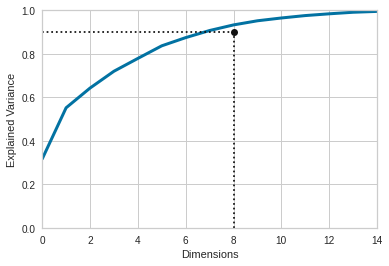

In [ ]:
# Plot melihat banykanya yang bisa direduksi
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 14, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.90], "k:")
plt.plot([0, d], [0.90, 0.90], "k:")
plt.plot(d, 0.90, "ko")
plt.grid(True)
plt.show()

Berdasarkan plot Explained Variance bahwa informasi yang bisa di reduksi lebih baik itu menjadi 8 kelompok. Jika Vif menggatakan lebih baik di reduksi menjadi 6 informasi saja. Untuk lebih memastikan, maka akan di cek nilai reduksi berdasarkan rasionya.

In [ ]:
#eigen value
pca.explained_variance_

array([5.38288879, 4.00268194, 1.54117453, 1.31647317, 1.00315619,
       0.98505086, 0.64099355, 0.55514622, 0.43789421, 0.32300664,
       0.21879746, 0.18890125, 0.13756245, 0.12226302, 0.06596754,
       0.05338431, 0.02845762, 0.        ])

In [ ]:
# Banyaknya Informasi yang bisa di tampilkan
np.cumsum(pca.explained_variance_ratio_)

array([0.31656976, 0.55196902, 0.64260609, 0.72002838, 0.77902438,
       0.8369556 , 0.87465268, 0.90730104, 0.93305377, 0.95204992,
       0.96491748, 0.97602683, 0.98411693, 0.99130727, 0.99518684,
       0.9983264 , 1.        , 1.        ])

Berdasarkan np.cumsum bahwa informasi pertama yang bisa di bawa sebesar 31%, informasi kedua yang bisa di bawa sebesar 55%, informasi ketiga yang bisa di bawa sebesar 64%, informasi keempat yang bisa di bawa sebesar 72%, informasi kelima yang bisa di bawa sebesar 77%, informasi keenam yang bisa di bawa sebesar 83%, informasi ketujuh yang bisa di bawa sebesar 83%,  informasi kedelapan yang bisa di bawa sebesar 87% dan seterunya.

In [ ]:
# mengkompres informasi sebanyak 90%
PCA(n_components=0.90)

PCA(n_components=0.9)

In [ ]:
# datagood akan membawa cluster sebanyak 90%
pca = PCA(n_components=0.90)
X_clear = pca.fit_transform(datagood)

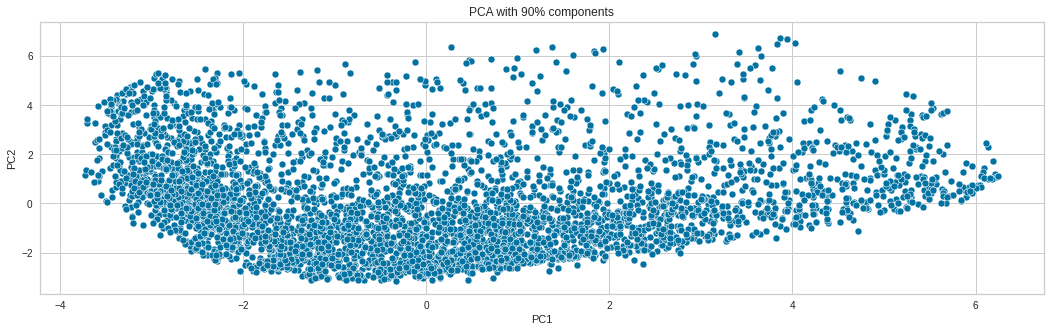

In [ ]:
# Menampilkan informasi sebaran data yang telah di kompres
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_clear [:, 0], y=X_clear [:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with 90% components')
plt.show()

Gambar di atas menujukkan kumpulan keseluruhan fitur-fitur dalam bentuk 2 dimensi, yang selanjutnya akan dilakukan cluster sesuai karkteristik masing-masing data.

# 6 - Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## 6a - K-Means Model Definition



In [ ]:
# Melakukan perulangan untuk cluster terbaik
K_kmeans = [KMeans(n_clusters=k, random_state=10).fit(X_clear)
                for k in range(1, 8)]

Elbow Method


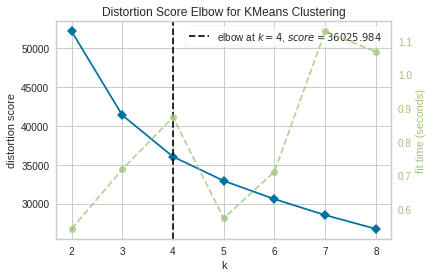

In [ ]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
print('Elbow Method')
Elbowdata = KElbowVisualizer(KMeans(), k=8)
Elbowdata.fit(X_clear)
Elbowdata.show()

Berdasarkan pengecekan jumah cluster mengunakan elbow, bahwa distribusi cluster yang baik adalah K = 4 dengan score 36025. Untuk lebih meyakinkan, bisa dilakukan pengecekan melalui visualisasi silhouette.

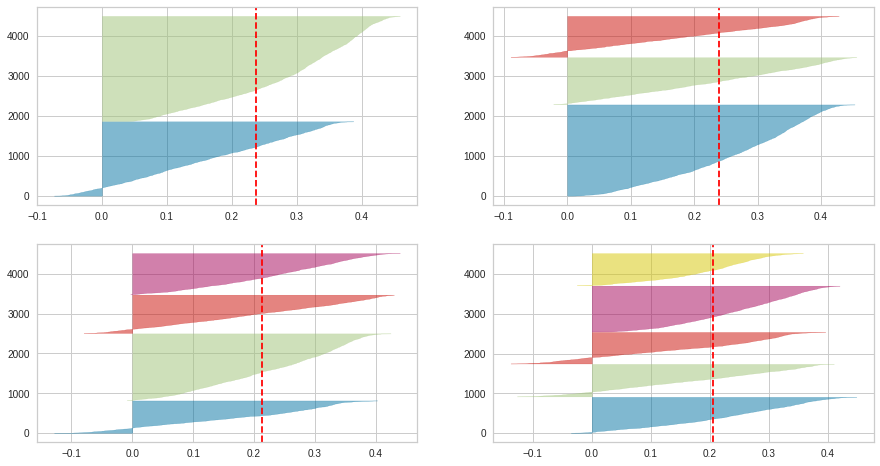

In [ ]:
# Mencari nilai K cluster terbaik berdasarkan visualisasi silhouette
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_clear) 

Berdasarkan visualisasi silhouette, juga bisa dilihat untuk K = 4, menghasilkan pembentukan cluster yang baik dimana seluruh pengelompokan melewati batas korelasi gari merah. Sumber pengecekan visualisasi silhouette [link](https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/). Melalui pengecekan plot elbow dan visualisasi silhouette, maka cluster terbaik yang terbentuk adalah K=4.


In [ ]:
# Definisi model k-means menjadi empat cluster
kmeanscluster= KMeans(n_clusters=4, random_state=26)

K-Means Clustering salah satu metode yang melakukan pengelompokan data dengan sistem partisi. Pada model k-means yang telah didefinisikan, dilakukan partisi pengelompokan K=4.

## 6b - Agglomerative Clustering Model Definition

In [ ]:
# Definisi model Agglomerative clustering menjadi empat cluster
agglocluster = AgglomerativeClustering(n_clusters=4)

Agglomerative clustering salah satu teknik clustering hirarki yang memiliki representasi cluster berupa set anggota. Pada model Agglomerative clustering yang telah didefinisikan, dilakukan pengelompokan set anggota sebanyak K=4.

## 6c - Spectral Clustering Model Definition

In [ ]:
# Definisi model Spectral Clustering menjadi empat cluster
spectral = SpectralClustering(n_clusters=4, gamma=0.01, random_state=24)

Spectral Clustering salah satu teknik pengelompokan spektral memanfaatkan spektrum matriks kemiripan data untuk melakukan reduksi dimensi sebelum pengelompokan dalam dimensi yang lebih sedikit. Pada model Spectral Clustering yang telah didefinisikan, dilakukan reduksi matriks dimensi menjadi K=4.

## 6d - DBSCAN Model Definition

In [ ]:
# Definisi model DBSCAN menjadi empat cluster
DBsc = DBSCAN(eps=2, min_samples=4)

DBSCAN merupakan sebuah metode clustering yang membangun area berdasarkan kepadatan yang terkoneksi (density- connected), setiap objek dari sebuah radius area (cluster). Pada model DBSCAN yang telah didefinisikan, jarak radius antar objek data adalah 2.

## 6e -Gaussian Mixture Definition

In [ ]:
# Definisi model GMM menjadi empat cluster
GMMclus = GaussianMixture(n_components=4, n_init=5, random_state=1)

Gaussian Mixture Models (GMM) melakukan pengelompokan dari masing-masing parameter suatu gerombolan kelompok data sebaran peluang gaussian. Pada model definisi GMM akan membuat 5 model (n_init), dimasing-masing 10 model terbag menjadi 4 cluster lalu diambil performa terbaiknya.

# 7 - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## 7a - K-Means Model Training

In [ ]:
# Model K-Means dilatih berdasarkan parameter model definition pada data yang sudah di PCA
kmeans_cluster = kmeanscluster.fit(X_clear)
kmeans_cluster

KMeans(n_clusters=4, random_state=26)

## 7b - Agglomerative Clustering Model Training

In [ ]:
# Model Agglomerative dilatih berdasarkan parameter model definition pada data yang sudah di PCA
Agglo_cluster = agglocluster.fit(X_clear)
Agglo_cluster

AgglomerativeClustering(n_clusters=4)

## 7c - Spectral Clustering Model Training

In [ ]:
# Model Spectral dilatih berdasarkan parameter model definition pada data yang sudah di PCA
Spectral_cluster = spectral.fit(X_clear)
Spectral_cluster 

SpectralClustering(gamma=0.01, n_clusters=4, random_state=24)

## 7d - DBSCAN Model Training

In [ ]:
# Model DBSCAN dilatih berdasarkan parameter model definition pada data yang sudah di PCA
DBSCAN_cluster = DBsc.fit(X_clear)
DBSCAN_cluster 

DBSCAN(eps=2, min_samples=4)

## 7e - GMM Model Training

In [ ]:
# Model GMM dilatih berdasarkan parameter model definition pada data yang sudah di PCA
GMM_cluster = GMMclus.fit(X_clear)
GMM_cluster

GaussianMixture(n_components=4, n_init=5, random_state=1)

# 8 - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

## 8a - K-Means Model Evaluation

Text(0, 0.5, 'Silhouette Score')

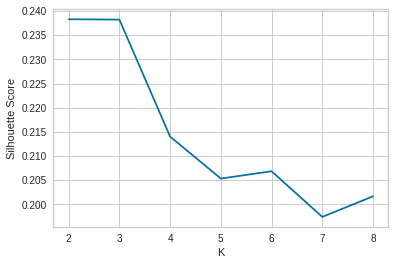

In [ ]:
# Score silhoutte terhadap cluster yang telah terbentuk
K=[2,3,4,5,6,7,8]
score_evaluation=[silhouette_score(X_clear, KMeans(n_clusters=i).fit(X_clear).labels_) for i in K]
plt.plot(K,score_evaluation)
plt.xlabel('K')
plt.ylabel('Silhouette Score')

In [ ]:
score_evaluation

[0.23828839076170935,
 0.23821467453615758,
 0.2140093683394025,
 0.20534623401748595,
 0.20685541474453406,
 0.1974114365156253,
 0.2016767654417894]

Model evaluation berdasarkan score silhouette diperolah bahwa cluster 4 cukup baik.

In [ ]:
# Prediksi cluster yang terbentuk dari metode K-Means
kmeans_clusters = kmeans_cluster.fit_predict(X_clear)
kmeans_clusters

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

Menghasilkan clustering dimasing-masing baris data kartu kredit, dimana membentuk K-means 4 kelompok yaitu 0, 1, 2, dan 3.

## 8a - AgglomerativeClustering Model Evaluationn

In [ ]:
# Prediksi cluster yang terbentuk dari metode Agglomerative Clustering
Agglo_clusters = Agglo_cluster.fit_predict(X_clear)
Agglo_clusters

array([2, 2, 2, ..., 0, 0, 0])

Menghasilkan clustering dimasing-masing baris data kartu kredit, dimana membentuk Agglomerative 4 kelompok yaitu 0, 1, 2, dan 3.

## 8c - SpectralClustering Model Evaluation

In [ ]:
# Prediksi cluster yang terbentuk dari metode Spectral Clustering
Spectral_clusters = Spectral_cluster.fit_predict(X_clear)
Spectral_clusters

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

Menghasilkan clustering dimasing-masing baris data kartu kredit, dimana membentuk Spectral 4 kelompok yaitu 0, 1, 2, dan 3.

## 8d - DBSCAN Model Evaluation

In [ ]:
# Prediksi cluster yang terbentuk dari metode DBSCAN
DBSCAN_clusters = DBSCAN_cluster.fit_predict(X_clear)
DBSCAN_clusters

array([0, 0, 0, ..., 0, 0, 0])

Menghasilkan clustering dimasing-masing baris data kartu kredit, jarak radius antar objek data DBSCAN sejauh 2, dimana membentuk DBSCAN 3 kelompok, yaitu -1, 0 dan 1.

## 8e - GMM Model Evaluation

In [ ]:
# Prediksi cluster yang terbentuk dari metode GMM
GMM_clusters = GMM_cluster.predict(X_clear)
GMM_clusters

array([2, 1, 2, ..., 3, 3, 3])

Menghasilkan clustering dimasing-masing baris data kartu kredit, dimana membentuk GMM 4 kelompok yaitu 0, 1, 2, dan 3.

In [ ]:
# Probabilitas masing-masing data terhadap fitur
# Threshold yang telah saya tentuan dibuat berdasarkan hasil score_evaluation
GMM_clusters2 = GMM_cluster.predict_proba(X_clear)
GMM_clusters2 

array([[0.00000000e+00, 2.11006199e-02, 9.78809621e-01, 8.97589237e-05],
       [2.17404260e-83, 8.59896589e-01, 1.22674874e-01, 1.74285370e-02],
       [9.29026408e-86, 5.71323844e-03, 9.94263357e-01, 2.34040818e-05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

Mislakan baris 1 menghasilkan nilai predict proba, lalu di bandingkan jika nilai kurang dari score evaluation yaitu 0.2 masuk ke katergori 2, dan seterusnya sampai 4465 baris kebawah.

In [ ]:
# Rata-rata percluster dari masing-masing fitur
GMM_cluster.means_

array([[-2.61080435,  0.61052714,  0.10225195,  0.13802661, -0.00636713,
         0.00833965, -0.11311071,  0.18321773],
       [ 1.72643763, -0.465515  ,  0.35629852, -0.45468758, -0.02845084,
         0.18021253, -0.06626761,  0.08021913],
       [ 0.09344155, -2.31072484, -0.59531608,  0.49144041, -0.11049718,
         0.25151308,  0.00718267, -0.29038108],
       [-0.02482638,  1.54449438, -0.14973841,  0.13743518,  0.11136888,
        -0.39228824,  0.17280081, -0.06808516]])

In [ ]:
# Mengetahui apakah model Converged
GMM_cluster.converged_

True

Model GMM converged, yang artinya model GMM dapat menyelesaikan pengelompokan untuk data kartu kredit.

In [ ]:
# Get `BIC` Score and `AIC` Score for Previous Model
print('BIC GMM Score : ', GMM_cluster.bic(X_clear))
print('AIC GMM Score : ', GMM_cluster.aic(X_clear))

BIC GMM Score :  86121.3307039486
AIC GMM Score :  84974.60987205169


Nilai AIC untuk model GMM dengan custer 4 memiliki nilai sebesar 84974, artinya cukup baik dalam memprediksi hasil clustering. 

# 9 - Visualisasi Clustering 

## 9a - K-Means Visualisasi

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# generate data
x = X_3d[:,0]
y = X_3d[:,1]
z = X_3d[:,2]

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
colors =["red","blue","green"]
cmap = ListedColormap(colors=colors)


# plot
sc = ax.scatter(x, y, z, s=40, c=kmeans.labels_, cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

plt.show()


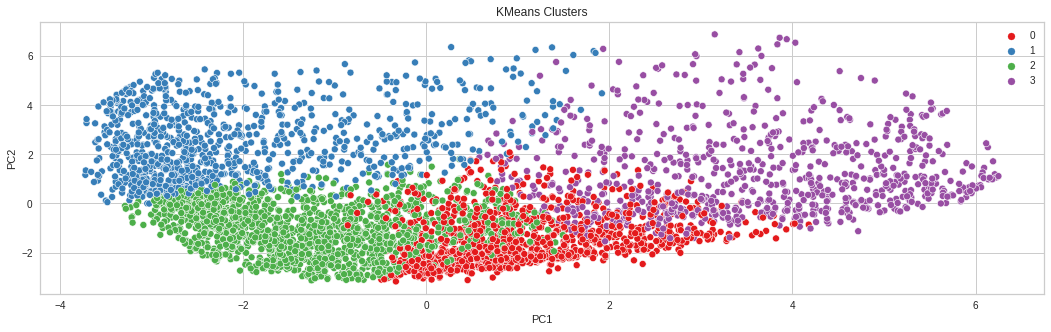

In [ ]:
# Visualisasi hasil PCA metode K-Means
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_clear[:, 0], y=X_clear[:, 1], hue=kmeans_cluster.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

Berdasarkan hasil visualisasi plot clustering mengunakan metode K-Means, digambarkan kelompok 0 (merah) berkumpul menjadi clustering bagian kanan bawah, namun masih ada beberapa cluster 0 menjauh atau outier dari setroid tengahnya. Untuk kelompok 1 (Biru) berkumpul menjadi satu clustering bagian kiri atas dengan baik. Untuk kelompok 2 (Hijau) berkumpul menjadi satu clustering bagian kiri bawah, namun masih ada beberapa cluster 2 menjauh atau oulier dari setroid tengahnya. Untuk kelompok 3 (Ungu) berkumpul menjadi satu clustering bagian kanan atas dengan baik.

In [ ]:
# Membuat tabel baru hasil clustering metode K-Means
kmeans_cluster2 = data_copy.copy()
kmeans_cluster2['cluster-Kmeans'] = kmeans_cluster.labels_

In [ ]:
# Melihat jumlah masing-masing data dari cluster K-Means yang telah terbentuk
KM_cluster = kmeans_cluster2.groupby('cluster-Kmeans').size().to_frame()
KM_cluster.columns = ["KM_size"]
KM_cluster

,KM_size
cluster-Kmeans,
0,1049
1,952
2,1662
3,812


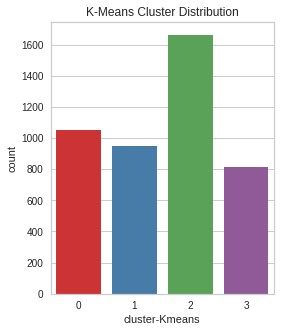

In [ ]:
# Visualisasi Diagram Batang Clustering K-Means
plt.figure(figsize=(4, 5))
sns.countplot(data=kmeans_cluster2, x='cluster-Kmeans', palette='Set1')
plt.title('K-Means Cluster Distribution')
plt.show()

Berdasarkan hasil visualisasi digram batang mengenai K-Means cluster distribution, dari jumlah bari data kartu kredit dengan 4475 baris dan 18 fitur, terbentuk 4 cluster. Cluster 0 sebanyak 1049 data dari 18 fitur awal. Cluster 1 sebanyak 952 data dari 18 fitur awal.  Cluster 2 sebanyak 1662 data dari 18 fitur awal. Cluster 3 sebanyak 812 data dari 18 fitur awal. Sehingga data kartu kredit cendrung berkumpul sesui kategori karakteristik pada cluster 2.

## 9b - AgglomerativeClustering Visualisasi

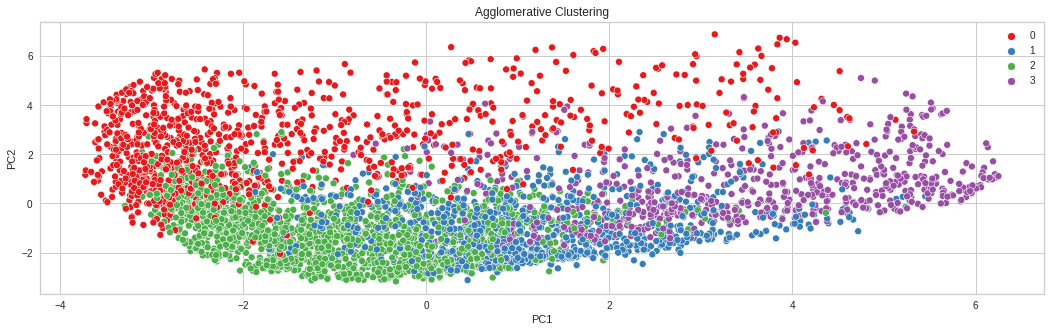

In [ ]:
# Visualisasi hasil PCA metode Agglomerative Clustering
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_clear[:, 0], y=X_clear[:, 1], hue=Agglo_clusters, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clustering')
plt.show()

Berdasarkan hasil visualisasi plot clustering mengunakan metode Agglomerative Clustering, digambarkan kelompok 0 (merah) berkumpul menjadi clustering bagian Kiri atas, namun masih ada beberapa cluster 0 menjauh atau outier dari setroid tengahnya. Untuk kelompok 1 (Biru) berkumpul menjadi satu clustering bagian kanan bawah, namun masih ada beberapa cluster 1 menjauh atau outier dari setroid tengahnya. Untuk kelompok 2 (Hijau) berkumpul menjadi satu clustering bagian kiri bawah, namun masih ada beberapa cluster 2 menjauh atau oulier dari setroid tengahnya. Untuk kelompok 3 (Ungu) berkumpul menjadi satu clustering bagian kanan atas, namun masih ada beberapa cluster 0 menjauh atau outier dari setroid tengahnya. Bisa terlihat bahwa Agglomerative Clustering, kurang baik melakukan clustering, karena masing banyak clustering yang jauh dari pusat sentroid.

In [ ]:
# Membuat tabel baru hasil clustering metode Agglomerative
aggo_cluster2 = data_copy.copy()
aggo_cluster2['clusterAgglo'] = agglocluster.labels_

In [ ]:
# Melihat jumlah masing-masing data dari Agglomerative Clustering yang telah terbentuk
Aggo_cluster = aggo_cluster2.groupby('clusterAgglo').size().to_frame()
Aggo_cluster.columns = ["Aggo_size"]
Aggo_cluster

,Aggo_size
clusterAgglo,
0,1023
1,981
2,1805
3,666


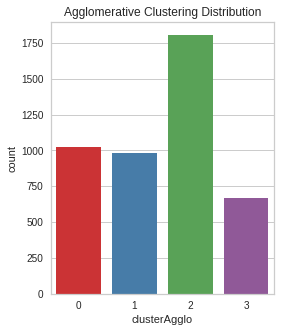

In [ ]:
# Visualisasi Diagram Batang Agglomerative Clustering
plt.figure(figsize=(4, 5))
sns.countplot(data=aggo_cluster2, x='clusterAgglo', palette='Set1')
plt.title('Agglomerative Clustering Distribution')
plt.show()

Berdasarkan hasil visualisasi digram batang mengenai Agglomerative Clustering distribution, dari jumlah bari data kartu kredit dengan 4475 baris dan 18 fitur, terbentuk 4 cluster. Cluster 0 sebanyak 1023 data dari 18 fitur awal. Cluster 1 sebanyak 981 data dari 18 fitur awal. Cluster 2 sebanyak 1805 data dari 18 fitur awal. Cluster 3 sebanyak 666 data dari 18 fitur awal. Sehingga data kartu kredit cendrung berkumpul sesui kategori karakteristik pada cluster 2.

## 9c - SpectralClustering Visualisasi

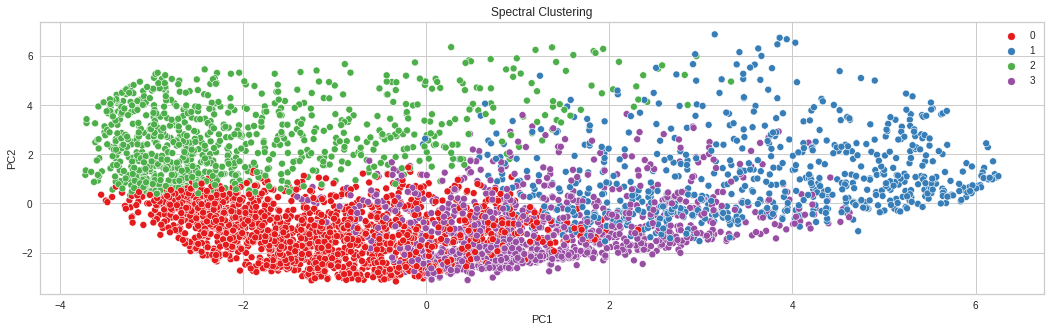

In [ ]:
# Visualisasi hasil PCA metode Spectral Clustering 
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_clear[:, 0], y=X_clear[:, 1], hue=Spectral_clusters, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Spectral Clustering')
plt.show()

Berdasarkan hasil visualisasi plot clustering mengunakan metode Spectral Clustering, digambarkan kelompok 0 (merah) berkumpul menjadi clustering bagian Kiri bawah, namun masih ada beberapa cluster 0 menjauh atau outier dari setroid tengahnya. Untuk kelompok 1 (Biru) berkumpul menjadi satu clustering bagian kanan atas, namun masih ada beberapa cluster 1 menjauh atau outier dari setroid tengahnya. Untuk kelompok 2 (Hijau) berkumpul menjadi satu clustering bagian kiri atas, namun masih ada beberapa cluster 2 menjauh atau oulier dari setroid tengahnya. Untuk kelompok 3 (Ungu) berkumpul menjadi satu clustering bagian kanan bawah, namun masih ada beberapa cluster 0 menjauh atau outier dari setroid tengahnya. Bisa terlihat bahwa Spectral Clustering, kurang baik melakukan clustering, karena masing banyak clustering yang jauh dari pusat sentroid.

In [ ]:
# Membuat tabel baru hasil clustering metode Spectral
Spectral_cluster2 = data_copy.copy()
Spectral_cluster2['clusterSepctral'] = spectral.labels_

In [ ]:
# Melihat jumlah masing-masing data dari Spectral Clustering yang telah terbentuk
Spec_cluster = Spectral_cluster2.groupby('clusterSepctral').size().to_frame()
Spec_cluster.columns = ["Sepctral_size"]
Spec_cluster

,Sepctral_size
clusterSepctral,
0,1796
1,713
2,895
3,1071


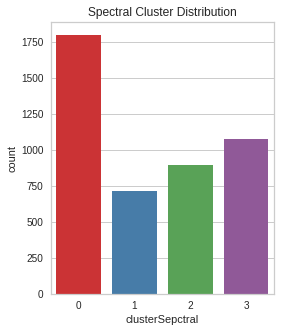

In [ ]:
# Visualisasi Diagram Batang Spectral Clustering
plt.figure(figsize=(4, 5))
sns.countplot(data=Spectral_cluster2, x='clusterSepctral', palette='Set1')
plt.title('Spectral Cluster Distribution')
plt.show()

Berdasarkan hasil visualisasi digram batang mengenai Spectral Clustering distribution, dari jumlah bari data kartu kredit dengan 4475 baris dan 18 fitur, terbentuk 4 cluster. Cluster 0 sebanyak 1796 data dari 18 fitur awal. Cluster 1 sebanyak 713 data dari 18 fitur awal. Cluster 2 sebanyak 895 data dari 18 fitur awal. Cluster 3 sebanyak 1071 data dari 18 fitur awal. Sehingga data kartu kredit cendrung berkumpul sesui kategori karakteristik pada cluster 0.

## 9d - DBSCAN Visualisasi

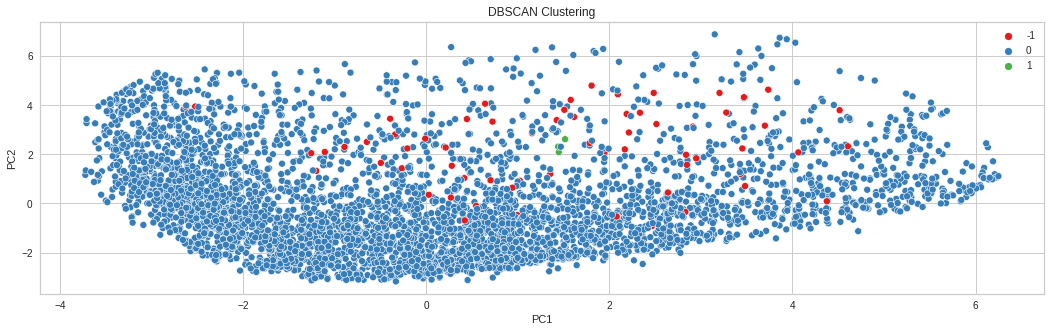

In [ ]:
# Visualisasi hasil PCA metode DBSCAN Clustering
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_clear[:, 0], y=X_clear[:, 1], hue=DBSCAN_clusters, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering')
plt.show()

Berdasarkan hasil visualisasi plot clustering mengunakan metode DBSCAN Clustering, digambarkan kelompok -1 (merah) tidak berkumpul menjadi satu kelompok clustering dan begitu juga untuk kelompok 1 (Hiju) tidak berkumpul menjadi satu kelompok clustering. SedangkanuUntuk kelompok 0 (Biru) berkumpul menjadi satu clustering hampir selurh bagian data kartu kredit. Bisa terlihat bahwa DBSCAN kurang baik dalam membentu Clustering, karena masing banyak clustering yang jauh dari pusat sentroid tetapi menjadi satu bagian kelompok. Mungkin untuk lebih baik lagi bisa di atur nilai epsilon yang sesuai.

In [ ]:
# Membuat tabel baru hasil clustering metode DBSCAN
DBSCAN_cluster2 = data_copy.copy()
DBSCAN_cluster2['clusterDBSCAN'] = DBsc.labels_

In [ ]:
# Melihat jumlah masing-masing data dari DBSCAN Clustering yang telah terbentuk
DBScan_cluster = DBSCAN_cluster2.groupby('clusterDBSCAN').size().to_frame()
DBScan_cluster.columns = ["DBSCAN_size"]
DBScan_cluster

,DBSCAN_size
clusterDBSCAN,
-1,67
0,4405
1,3


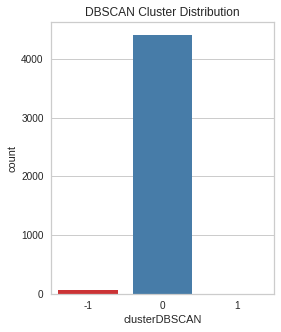

In [ ]:
# Visualisasi Diagram Batang DBSCAN Clustering
plt.figure(figsize=(4, 5))
sns.countplot(data=DBSCAN_cluster2, x='clusterDBSCAN', palette='Set1')
plt.title('DBSCAN Cluster Distribution')
plt.show()

Berdasarkan hasil visualisasi digram batang mengenai DBSCAN Clustering distribution, dari jumlah bari data kartu kredit dengan 4475 baris dan 18 fitur, terbentuk 3 cluster dari hasil epsilon jaraknya bernilai 2. Cluster -1 sebanyak 67 data dari 18 fitur awal. Cluster 0 sebanyak 4405 data dari 18 fitur awal. Cluster 1 sebanyak 3 data dari 18 fitur awal. Sehingga data kartu kredit cendrung berkumpul sesui kategori karakteristik pada cluster 0.

## 9e - GMM Visualisasi

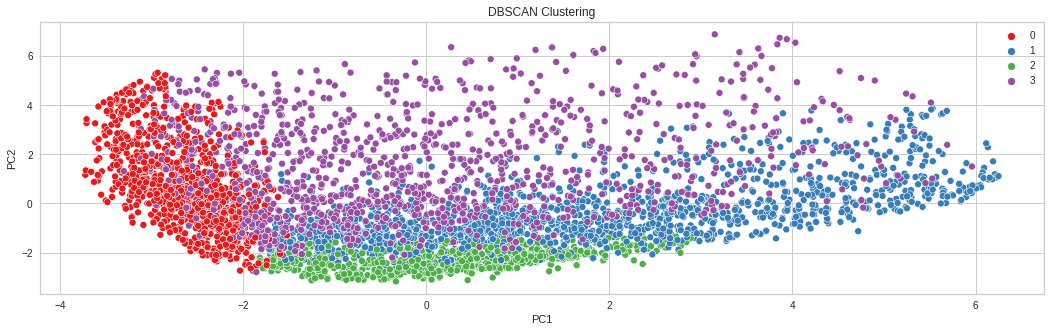

In [ ]:
# Visualisasi hasil PCA metode GMM clustering
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_clear[:, 0], y=X_clear[:, 1], hue=GMM_clusters, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering')
plt.show()

Berdasarkan hasil visualisasi plot clustering mengunakan metode Spectral Clustering, digambarkan kelompok 0 (merah) berkumpul menjadi clustering bagian Kiri samping, namun masih ada beberapa cluster 0 menjauh atau outier dari setroid tengahnya. Untuk kelompok 1 (Biru) berkumpul menjadi satu clustering bagian tengah, namun masih ada beberapa cluster 1 menjauh atau outier dari setroid tengahnya. Untuk kelompok 2 (Hijau) berkumpul menjadi satu clustering bagian bawah, namun masih ada beberapa cluster 2 menjauh atau oulier dari setroid tengahnya. Untuk kelompok 3 (Ungu) berkumpul menjadi satu clustering bagian atas, namun masih ada beberapa cluster 0 menjauh atau outier dari setroid tengahnya. Bisa terlihat bahwa Spectral Clustering, kurang baik melakukan clustering, karena masing banyak clustering yang jauh dari pusat sentroid.

In [ ]:
# Membuat tabel baru hasil clustering metode GMM
GMM_cluster2 = data_copy.copy()
GMM_cluster2['clusterGMM'] = GMM_clusters

In [ ]:
# Melihat jumlah masing-masing data dari GMM Clustering yang telah terbentuk
gmm_cluster = GMM_cluster2.groupby('clusterGMM').size().to_frame()
gmm_cluster.columns = ["GMM_size"]
gmm_cluster

,GMM_size
clusterGMM,
0,1010
1,1523
2,782
3,1160


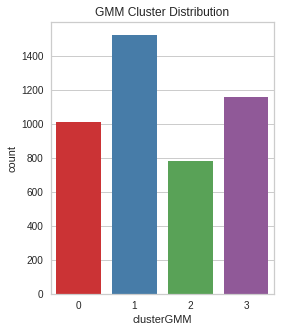

In [ ]:
# Visualisasi Diagram Batang GMM Clustering
plt.figure(figsize=(4, 5))
sns.countplot(data=GMM_cluster2, x='clusterGMM', palette='Set1')
plt.title('GMM Cluster Distribution')
plt.show()

Berdasarkan hasil visualisasi digram batang mengenai GMM Clustering distribution, dari jumlah bari data kartu kredit dengan 4475 baris dan 18 fitur, terbentuk 4 cluster. Cluster 0 sebanyak 1010 data dari 18 fitur awal. Cluster 1 sebanyak 1523 data dari 18 fitur awal. Cluster 2 sebanyak 782 data dari 18 fitur awal. Cluster 3 sebanyak 1160 data dari 18 fitur awal. Sehingga data kartu kredit cendrung berkumpul sesui kategori karakteristik pada cluster 1.

## 9f - Tabel Clustering

In [ ]:
# Hasil Clustering masing-masing metode dengan data aslinya
data1 = kmeans_cluster2[['cluster-Kmeans']]
data2 = aggo_cluster2[['clusterAgglo']]
data3 = Spectral_cluster2[['clusterSepctral']]
data4 = DBSCAN_cluster2[['clusterDBSCAN']]
data5 = GMM_cluster2[['clusterGMM']]
pd.concat([data,data1,data2,data3,data4,data5], axis=1)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster-Kmeans,clusterAgglo,clusterSepctral,clusterDBSCAN,clusterGMM
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,...,1200.0,0.000000,309.854995,0.000000,8,2,2,0,0,2
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,...,1000.0,215.325023,410.484825,0.000000,8,2,2,0,0,1
2,2322,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,...,1500.0,0.000000,309.854995,0.000000,8,2,2,0,0,2
3,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,...,1000.0,258.032630,151.696433,0.000000,8,2,2,0,0,1
4,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,...,1500.0,397.090516,227.143184,0.000000,8,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,...,1200.0,1379.635287,271.364415,0.090909,11,1,0,2,0,0
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,...,4150.0,4372.148648,241.645387,0.090909,11,1,0,2,0,0
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,...,10100.0,1039.000037,886.050237,0.000000,11,1,0,2,0,3
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,...,6000.0,905.844846,2376.919568,0.090909,11,1,0,2,0,3


# 10 - Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [ ]:
# Sebelum inference kita tampilkan dulu data inference yang di awal
datainfernce

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5326,1995.089853,1.000000,8335.69,7400.85,934.84,0.000000,1.000000,0.818182,0.272727,0.000000,0,69,7000.0,3348.095046,1298.363292,0.000000,11
1,7670,5825.287700,1.000000,230.00,230.00,0.00,1909.594385,0.083333,0.083333,0.000000,0.250000,3,1,7000.0,1537.817125,1442.075559,0.000000,12
2,4678,123.632161,1.000000,506.00,146.00,360.00,0.000000,1.000000,0.166667,1.000000,0.000000,0,14,6000.0,662.272892,184.935623,0.083333,12
3,5972,463.071288,1.000000,0.00,0.00,0.00,1381.989484,0.000000,0.000000,0.000000,0.250000,7,0,1000.0,5445.356870,4496.934117,0.400000,12
4,4784,24.176932,1.000000,189.85,189.85,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,4,3000.0,184.604550,100.687061,0.000000,12
5,1980,2820.576665,0.818182,0.00,0.00,0.00,10717.891950,0.000000,0.000000,0.000000,0.583333,11,0,7000.0,9602.278174,937.556314,0.142857,12
6,1358,2764.810135,1.000000,390.52,369.80,20.72,75.749860,0.333333,0.250000,0.083333,0.083333,2,6,3000.0,743.242536,1093.199562,0.000000,12
7,3424,126.945696,1.000000,1086.26,0.00,1086.26,0.000000,1.000000,0.000000,1.000000,0.000000,0,34,4500.0,981.005079,162.218628,0.916667,12
8,2284,0.000000,0.000000,152.28,0.00,152.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,0.000000,NaN,0.000000,12
9,288,3558.685862,1.000000,1036.19,1036.19,0.00,3270.549354,0.250000,0.250000,0.000000,0.500000,11,6,7300.0,1616.614478,1100.977131,0.000000,12


In [ ]:
# Mengisi data inference yang terdapat missing value
datainfernce['MINIMUM_PAYMENTS'].fillna(datainfernce['MINIMUM_PAYMENTS'].median(), inplace=True)

In [ ]:
# Memisahkan antara kolom numerik dengan kolom kategorik

numerik_col_inf = datainfernce._get_numeric_data().columns.tolist()
kategorik_col_inf = datainfernce.select_dtypes(include=['object']).columns.tolist()
print('Numeric Columns infernce     : ', numerik_col_inf)
print('Categorical Columns infernce : ', kategorik_col_inf)

Numeric Columns infernce     :  ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
Categorical Columns infernce :  []


In [ ]:
# Membuat tabel data inference baru yang sudah tidak ada missing value dan restrat index
inf = datainfernce[numerik_col_inf].reset_index().drop(['index'], axis = 1)

In [ ]:
# Feature Scaling pada data inference
inf_scaler = StandardScaler()
inf_scaler = inf_scaler.fit(inf)
datagood_inf = inf_scaler.transform(inf)
datagood_inf

array([[ 0.70872406,  0.12004345,  0.39539434,  2.96512484,  2.97168915,
         1.72310879, -0.54608809,  1.18124892,  2.61072944, -0.14221031,
        -0.7905693 , -0.78331865,  2.64990938,  0.96811535,  0.32715792,
         0.08959861, -0.54906634, -3.        ],
       [ 1.78077439,  2.16480737,  0.39539434, -0.39961627, -0.32517325,
        -0.64774769,  0.05475327, -0.98437445, -0.44404564, -0.7590234 ,
         0.39528512, -0.09215514, -0.66247735,  0.96811535, -0.30560707,
         0.20954818, -0.54906634,  0.33333333],
       [ 0.4123552 , -0.87904049,  0.39539434, -0.28504631, -0.363793  ,
         0.26525168, -0.54608809,  1.18124892, -0.09762532,  1.50262687,
        -0.7905693 , -0.78331865, -0.02922694,  0.48885033, -0.61164502,
        -0.83972479, -0.25250389,  0.33333333],
       [ 1.0041782 , -0.69782978,  0.39539434, -0.49509123, -0.4309178 ,
        -0.64774769, -0.11125415, -1.18124845, -0.7904618 , -0.7590234 ,
         0.39528512,  0.82939622, -0.71118892, -1.907

## 10a - Model Inference K-means

In [ ]:
# Hasil Prediksi clustering dari data baru Inference menggunakan metode K-Means
kmeans_clusters_inf = kmeans_cluster.fit_predict(datagood_inf)
Kmeans_Inference = pd.DataFrame(kmeans_clusters_inf, columns=['K-Means Inference'])
Kmeans_Inference

,K-Means Inference
0,3
1,2
2,0
3,2
4,2
5,1
6,2
7,0
8,0
9,1


Data inference menggunakan metode K-Means rata-rata masuk di clustering kelompok 0, 1, 2 dan 3.

## 10b - Model Inference AgglomerativeClustering 

In [ ]:
# Hasil Prediksi clustering dari data baru Inference menggunakan metode Agglomerative
Agglo_clusters_inf = Agglo_cluster.fit_predict(datagood_inf)
Agglo_Inference = pd.DataFrame(Agglo_clusters_inf, columns=['AgglomerativeClustering Inference'])
Agglo_Inference

,AgglomerativeClustering Inference
0,3
1,0
2,2
3,0
4,0
5,1
6,0
7,2
8,2
9,1


Data inference menggunakan metode Agglomerative rata-rata masuk di clustering kelompok 0, 1, 2 dan 3.

## 10c - Model Inference SpectralClustering 

In [ ]:
# Hasil Prediksi clustering dari data baru Inference menggunakan metode Spectral
Spectral_clusters_inf = Spectral_cluster.fit_predict(datagood_inf)
Spectral_Inference = pd.DataFrame(Spectral_clusters_inf, columns=['SpectralClustering Inference'])
Spectral_Inference

,SpectralClustering Inference
0,2
1,1
2,3
3,1
4,1
5,0
6,1
7,3
8,3
9,0


Data inference menggunakan metode Spectral rata-rata masuk di clustering kelompok 0, 1, 2 dan 3.

## 10d - Model Inference DBSCAN

In [ ]:
# Hasil Prediksi clustering dari data baru Inference menggunakan metode DBSCAN
DBSCAN_clusters_inf = DBSCAN_cluster.fit_predict(datagood_inf)
DBSCAN_Inference = pd.DataFrame(DBSCAN_clusters_inf, columns=['DBSCAN Inference'])
DBSCAN_Inference

,DBSCAN Inference
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


Data inference menggunakan metode DBSCAN dengan nilai epsilon 2 dimana rata-rata masuk di clustering kelompok -1.

In [ ]:
# Menggabungkan hasil clustering pada data inference
pd.concat([datainfernce,Kmeans_Inference,Agglo_Inference,Spectral_Inference,DBSCAN_Inference], axis=1)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,K-Means Inference,AgglomerativeClustering Inference,SpectralClustering Inference,DBSCAN Inference
0,5326,1995.089853,1.000000,8335.69,7400.85,934.84,0.000000,1.000000,0.818182,0.272727,...,69,7000.0,3348.095046,1298.363292,0.000000,11,3,3,2,-1
1,7670,5825.287700,1.000000,230.00,230.00,0.00,1909.594385,0.083333,0.083333,0.000000,...,1,7000.0,1537.817125,1442.075559,0.000000,12,2,0,1,-1
2,4678,123.632161,1.000000,506.00,146.00,360.00,0.000000,1.000000,0.166667,1.000000,...,14,6000.0,662.272892,184.935623,0.083333,12,0,2,3,-1
3,5972,463.071288,1.000000,0.00,0.00,0.00,1381.989484,0.000000,0.000000,0.000000,...,0,1000.0,5445.356870,4496.934117,0.400000,12,2,0,1,-1
4,4784,24.176932,1.000000,189.85,189.85,0.00,0.000000,0.333333,0.333333,0.000000,...,4,3000.0,184.604550,100.687061,0.000000,12,2,0,1,-1
5,1980,2820.576665,0.818182,0.00,0.00,0.00,10717.891950,0.000000,0.000000,0.000000,...,0,7000.0,9602.278174,937.556314,0.142857,12,1,1,0,-1
6,1358,2764.810135,1.000000,390.52,369.80,20.72,75.749860,0.333333,0.250000,0.083333,...,6,3000.0,743.242536,1093.199562,0.000000,12,2,0,1,-1
7,3424,126.945696,1.000000,1086.26,0.00,1086.26,0.000000,1.000000,0.000000,1.000000,...,34,4500.0,981.005079,162.218628,0.916667,12,0,2,3,-1
8,2284,0.000000,0.000000,152.28,0.00,152.28,0.000000,1.000000,0.000000,1.000000,...,12,4000.0,0.000000,1093.199562,0.000000,12,0,2,3,-1
9,288,3558.685862,1.000000,1036.19,1036.19,0.00,3270.549354,0.250000,0.250000,0.000000,...,6,7300.0,1616.614478,1100.977131,0.000000,12,1,1,0,-1


# 11 - Pengambilan Kesimpulan

Proses Model clustering untuk melakukan Customer Segmentation dari data kartu kredit. Data kartu kredit memiliki 4475 baris dan 18 fitur. Berdasarkan informasi 18 fitur, maka saya akan menanalisis clustering yaitu menggunakan metode K-Means, Agglomerative Clustering, Spectral Clustering, DBSCAN Clustering dan GMM Clustering.

---
**Exploratory Data Analysis (EDA)**

Berdasarkan hasil visualisasi data 18 fitur data kartu kredit, terdapat beberapa fitur yang mempunyai sebaran data berbentuk lonceng distribusi seperti, CUST_ID, PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY yang artinya bahwa sebaran data berkumpul di bagian tengah mean distribusi. Terdapat juga beberapa fitur membentuk lonceng kiri distribusi seperti BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, ONEOFF_PURCHASES_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS dan PRC_FULL_PAYMENT yang artinya seberan data berkumpul di sisi ekor kiri dengan nilai yang tidak sesui standar rasio skewness, biasanya ditandai dengan nilai skewness positif yang tinggi. Terdapat juga fitur membentuk lonceng kanan distribusi seperti BALANCE_FREQUENCY dan TENURE yang artinya seberan data berkumpul di sisi ekor kanan dengan nilai yang tidak sesui standar rasio skewness, biasanya ditandai dengan nilai skewness negatif yang rendah.

---
**Clustering**

Berdasarkan proses pemilihan nilai K menggunakan metode elbow dan visualisasi silhouette di dapatkan nilai K jumlah clustering terbaik adalah 4. Saya melakukan 5 metode clustering pada data kartu kredit yaitu K-Means, Agglomerative Clustering, Spectral Clustering, DBSCAN Clustering dan GMM Clustering. **Jika di tinjau dari hasil visualisasi bahwa metode K-Means melakukan clustering paling baik dibandingkan metode lainnya**. Berdasarkan hasil visualisasi digram batang mengenai K-Means cluster distribution, dari jumlah bari data kartu kredit dengan 4475 baris dan 18 fitur, terbentuk 4 cluster. Cluster 0 sebanyak 1049 data dari 18 fitur awal. Cluster 1 sebanyak 952 data dari 18 fitur awal. Cluster 2 sebanyak 1662 data dari 18 fitur awal. Cluster 3 sebanyak 812 data dari 18 fitur awal. Sehingga data kartu kredit cendrung berkumpul sesui kategori karakteristik pada cluster 2.

Metode Clustering lainnya, membentuk pengelompokna data yang masih ada ouliernya. Sehingga kurang baik, dibandingkan K-Means yang membagi secara kelompok secara benar.

# Conceptual Problems

> 1 - Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

Jawab : Inertia merupakan algoritma rumus dalam K-Means dalam membantu pembetukkan kumpulan data di keompokkan berdasarkan karakteristik yang sama. Dalam memisahkan data diperlukan nilai inersia yang menimum, agar antar data dapat berpisah antar variansnya. Sehingga inertia merupakan jumlah kuadrat dalam kluster yang dapat dijadikan sebagai ukuran seberapa banyak data anggota-anggota dalam kluster yang sama. 

> 2 - Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

Jawab : Elbow method adalah metoda yang sering dipakai untuk menentukan jumlah cluster yang akan digunakan pada k-means clustering.Elbow digunakkan agar dapat menentukan informasi jumlah cluster terbaik dari keseluruhan data yang ada, dengan cara melihat persentase hasil perbandingan antara jumlah cluster yang akan membentuk siku pada suatu titik. Elbow kurang baik menghasilkan nilai K jika terdapat beberapa data pencilan dan laster yang bervariasi, serta sensitif terhadap skala data, tetapi elbow juga dapat berkerja dengan paling baik pada data yang jumlahnya besar dan dapat menyesuaika anggota dalam klaster melalui K yang paling siku titiknya.

> 3- Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

Jawab : K-Means Clustering salah satu metode yang melakukan pengelompokan data dengan sistem partis. Agglomerative clustering salah satu teknik clustering hirarki yang memiliki representasi cluster berupa set anggota. Spectral Clustering salah satu teknik pengelompokan spektral memanfaatkan spektrum matriks kemiripan data untuk melakukan reduksi dimensi sebelum pengelompokan dalam dimensi yang lebih sedikit. DBSCAN merupakan sebuah metode clustering yang membangun area berdasarkan kepadatan yang terkoneksi (density- connected), setiap objek dari sebuah radius area (cluster). Gaussian Mixture Models (GMM) melakukan pengelompokan dari masing-masing parameter suatu gerombolan kelompok data sebaran peluang gaussian.